In [1]:
# kaggel에서 데이터 다운 받기
# import opendatasets as od
# od.download('https://www.kaggle.com/datasets/uciml/student-alcohol-consumption?select=student-mat.csv')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px # plotly라는 시각화라이브러리
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import missingno as msno # 결측치를 확인할 수 있는 라이브러리
import os
import sys
import warnings
import chart_studio
import chart_studio.plotly as py

warnings.filterwarnings('ignore')

# pandas 옵션 지정 -> 최대 컬럼 수 출력, float는 2자리까지 출력
pd.options.display.max_columns = 50
pd.options.display.float_format = '{:.2f}'.format

# ****About Dataset****

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

1. G1 - first period grade (numeric: from 0 to 20)
2. G2 - second period grade (numeric: from 0 to 20)
3. G3 - final grade (numeric: from 0 to 20, output target)

In [3]:
mat_df = pd.read_csv('~/desktop/git/hakcerton/data/student-alcohol-consumption/student-mat.csv')
pot_df = pd.read_csv('~/desktop/git/hakcerton/data/student-alcohol-consumption/student-por.csv')

mat_df.head()

In [4]:
# 복사본으로 카피
mat_eda_df = mat_df.copy()
pot_eda_df = pot_df.copy()

In [5]:
mat_eda_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00
mean,16.70,2.75,2.52,1.45,2.04,0.33,3.94,3.24,3.11,1.48,2.29,3.55,5.71,10.91,10.71,10.42
std,1.28,1.09,1.09,0.70,0.84,0.74,0.90,1.00,1.11,0.89,1.29,1.39,8.00,3.32,3.76,4.58
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,3.00,0.00,0.00
25%,16.00,2.00,2.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,3.00,0.00,8.00,9.00,8.00
50%,17.00,3.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,4.00,11.00,11.00,11.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,8.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,75.00,19.00,19.00,20.00


In [6]:
pot_eda_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,16.74,2.51,2.31,1.57,1.93,0.22,3.93,3.18,3.18,1.50,2.28,3.54,3.66,11.40,11.57,11.91
std,1.22,1.13,1.10,0.75,0.83,0.59,0.96,1.05,1.18,0.92,1.28,1.45,4.64,2.75,2.91,3.23
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,16.00,2.00,1.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,2.00,0.00,10.00,10.00,10.00
50%,17.00,2.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,2.00,11.00,11.00,12.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,6.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,32.00,19.00,19.00,19.00


<AxesSubplot:>

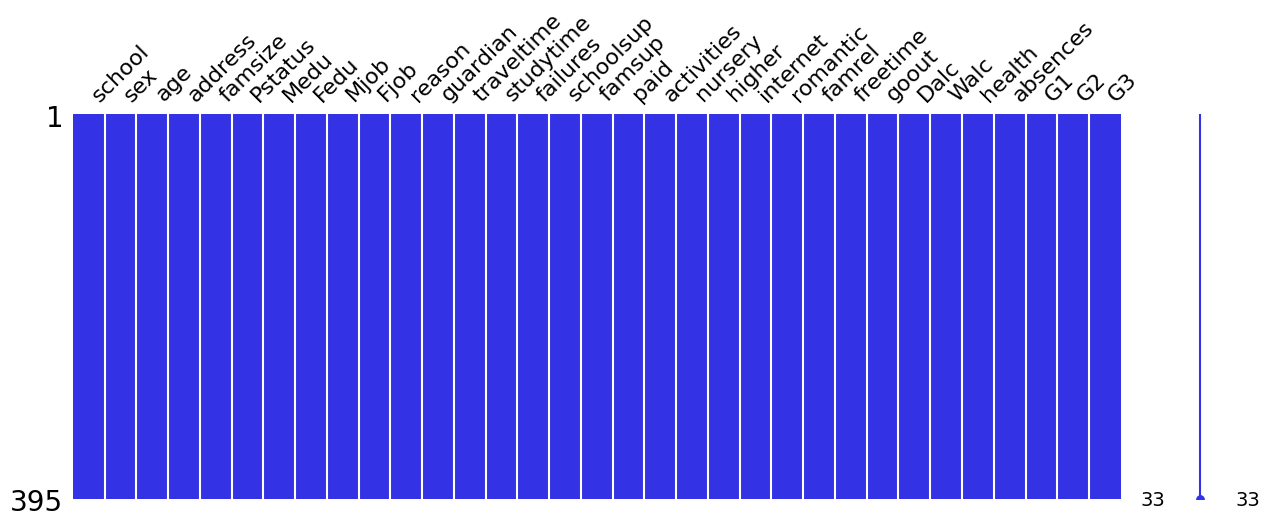

In [7]:
msno.matrix(df=mat_eda_df.iloc[:, :], color=(0.2, 0.2, 0.9), figsize=(15, 5))

<AxesSubplot:>

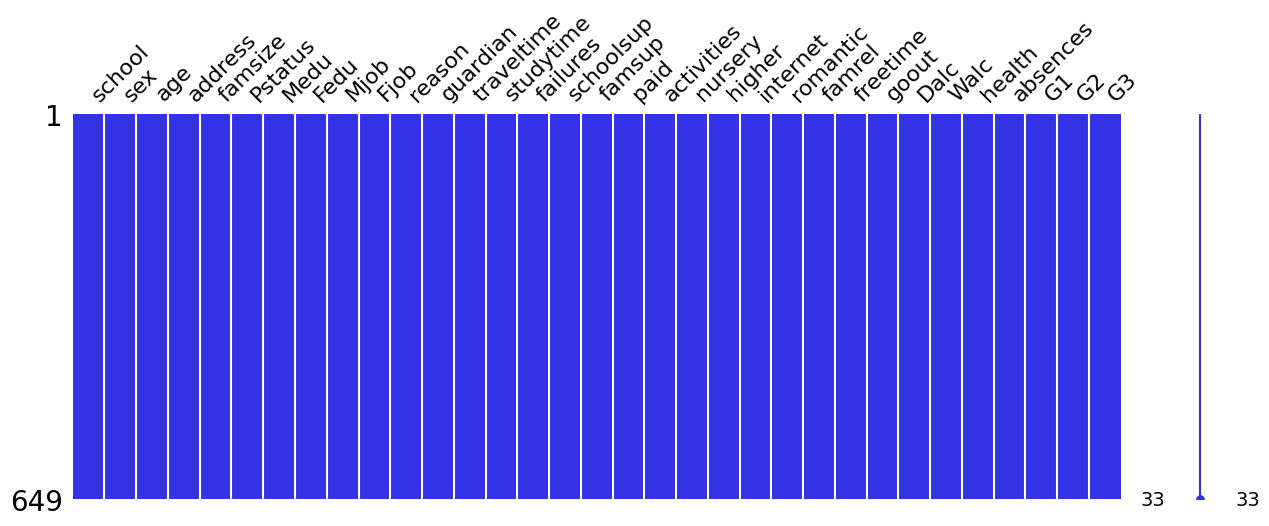

In [8]:
msno.matrix(df=pot_eda_df.iloc[:, :], color=(0.2, 0.2, 0.9), figsize=(15, 5))

In [9]:
# 수학은 M 포트투칼 어는 P
mat_eda_df['subject'] = 'M'
pot_eda_df['subject'] = 'P'

In [10]:
concat_df = pd.concat([mat_eda_df, pot_eda_df], axis=0)

In [11]:
# Dalc 컬럼을  Dalc 와 Walc의 평균으로 재조정
concat_df['Malc'] = (concat_df['Dalc'] + concat_df['Walc']) / 2
concat_df.drop(['Dalc','Walc'], axis=1, inplace=True)

In [12]:
concat_df['Agrade'] = (concat_df['G1'] + concat_df['G2'] + concat_df['G3']) / 3
concat_df.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)

In [13]:
concat_df.reset_index(inplace=True)
concat_df.drop('index', axis=1, inplace=True)

In [14]:
#concat_df.drop('level_0', axis=1, inplace=True)

In [15]:
concat_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,subject,Malc,Agrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,3,6,M,1.00,5.67
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,3,4,M,1.00,5.33
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,3,10,M,2.50,8.33
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,5,2,M,1.00,14.67
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,5,4,M,1.50,8.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,5,4,P,1.50,10.33
1040,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,4,P,1.00,15.33
1041,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,5,6,P,1.00,10.67
1042,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,2,6,P,3.50,10.00


## 상관관계

In [16]:
from dython.nominal import identify_nominal_columns
cat_featrues = identify_nominal_columns(mat_eda_df)
cat_featrues

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'subject']

In [17]:
from dython.nominal import associations

## 수학성적데이터 상관관계

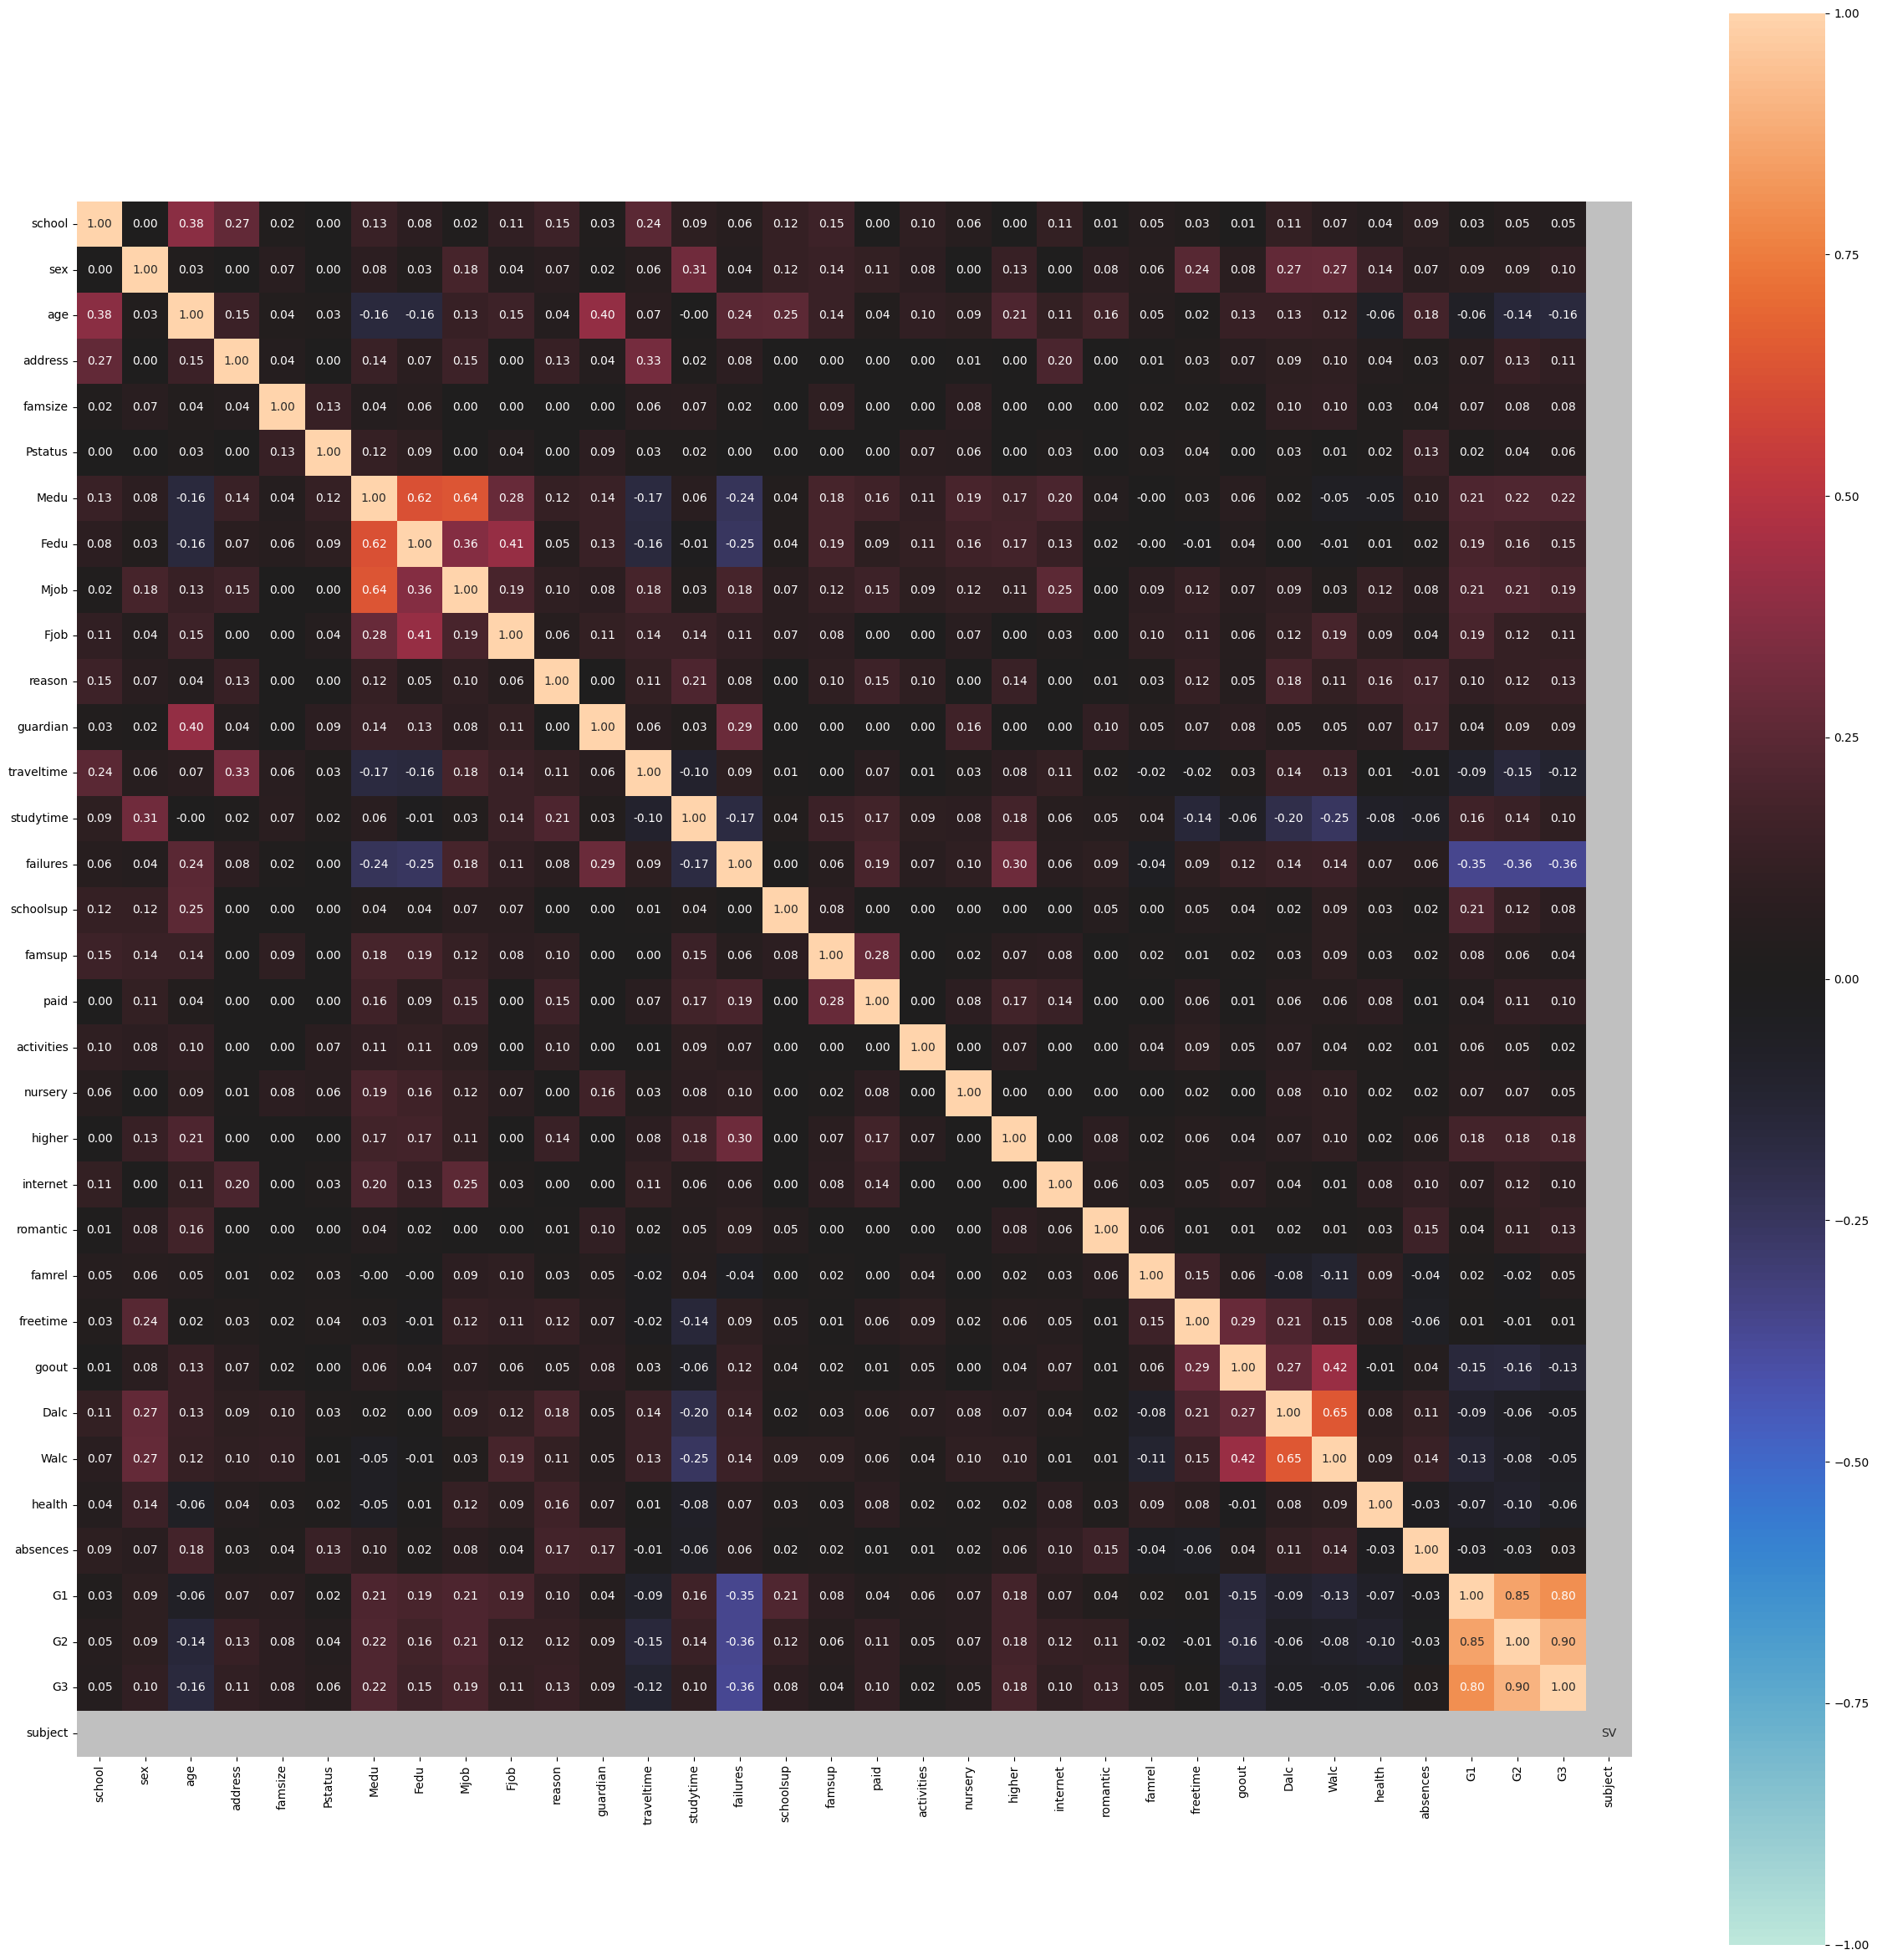

In [18]:
# math 데이터 상관관계
complete_correlation = associations(mat_eda_df, filename='./corr_png/mat_correlation.png', figsize=(30, 30))

In [19]:
# Dalc과 feature 간의 상관관계
complete_correlation['corr'].sort_values(by='Dalc', ascending=False).style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
Dalc,0.114,0.268,0.131,0.093,0.102,0.031,0.020,0.002,0.095,0.115,0.181,0.054,0.138,-0.196,0.136,0.021,0.032,0.062,0.067,0.085,0.070,0.036,0.015,-0.078,0.209,0.267,1.000,0.648,0.077,0.112,-0.094,-0.064,-0.055,0.000
Walc,0.065,0.274,0.117,0.101,0.103,0.006,-0.047,-0.013,0.033,0.185,0.114,0.048,0.134,-0.254,0.142,0.087,0.087,0.060,0.037,0.100,0.100,0.012,0.010,-0.113,0.148,0.420,0.648,1.000,0.092,0.136,-0.126,-0.085,-0.052,0.000
sex,0.000,1.000,0.029,0.000,0.068,0.000,0.078,0.035,0.185,0.043,0.070,0.018,0.060,0.306,0.044,0.121,0.138,0.113,0.080,0.000,0.130,0.000,0.083,0.059,0.239,0.076,0.268,0.274,0.144,0.067,0.092,0.091,0.103,0.000
goout,0.007,0.076,0.127,0.069,0.023,0.003,0.064,0.043,0.072,0.060,0.053,0.084,0.029,-0.064,0.125,0.038,0.016,0.010,0.046,0.005,0.040,0.074,0.008,0.065,0.285,1.000,0.267,0.420,-0.010,0.044,-0.149,-0.162,-0.133,0.000
freetime,0.033,0.239,0.016,0.035,0.018,0.039,0.031,-0.013,0.120,0.108,0.121,0.069,-0.017,-0.143,0.092,0.045,0.011,0.064,0.090,0.025,0.061,0.051,0.011,0.151,1.000,0.285,0.209,0.148,0.076,-0.058,0.013,-0.014,0.011,0.000
reason,0.155,0.070,0.041,0.130,0.000,0.000,0.119,0.050,0.096,0.057,1.000,0.000,0.112,0.207,0.076,0.000,0.096,0.152,0.100,0.000,0.135,0.000,0.009,0.029,0.121,0.053,0.181,0.114,0.162,0.173,0.104,0.122,0.125,0.000
traveltime,0.242,0.060,0.071,0.328,0.063,0.028,-0.172,-0.158,0.185,0.136,0.112,0.063,1.000,-0.101,0.092,0.009,0.003,0.066,0.008,0.033,0.084,0.111,0.022,-0.017,-0.017,0.029,0.138,0.134,0.008,-0.013,-0.093,-0.153,-0.117,0.000
failures,0.060,0.044,0.244,0.079,0.016,0.003,-0.237,-0.250,0.182,0.107,0.076,0.291,0.092,-0.174,1.000,0.000,0.055,0.188,0.069,0.101,0.300,0.063,0.093,-0.044,0.092,0.125,0.136,0.142,0.066,0.064,-0.355,-0.356,-0.360,0.000
age,0.378,0.029,1.000,0.147,0.038,0.030,-0.164,-0.163,0.129,0.154,0.041,0.401,0.071,-0.004,0.244,0.252,0.141,0.036,0.103,0.087,0.209,0.112,0.165,0.054,0.016,0.127,0.131,0.117,-0.062,0.175,-0.064,-0.143,-0.162,0.000
Fjob,0.106,0.043,0.154,0.000,0.000,0.041,0.284,0.410,0.191,1.000,0.057,0.111,0.136,0.137,0.107,0.071,0.084,0.000,0.000,0.070,0.000,0.026,0.000,0.095,0.108,0.060,0.115,0.185,0.088,0.042,0.191,0.120,0.115,0.000


In [20]:
# 오름차순으로 정렬
corr_df = complete_correlation['corr'].sort_values(by='Dalc', ascending=False)

In [21]:
# 전체 상관관계 출력
px.bar(corr_df, x='Dalc')

## 포르투칼어 데이터 상관관계

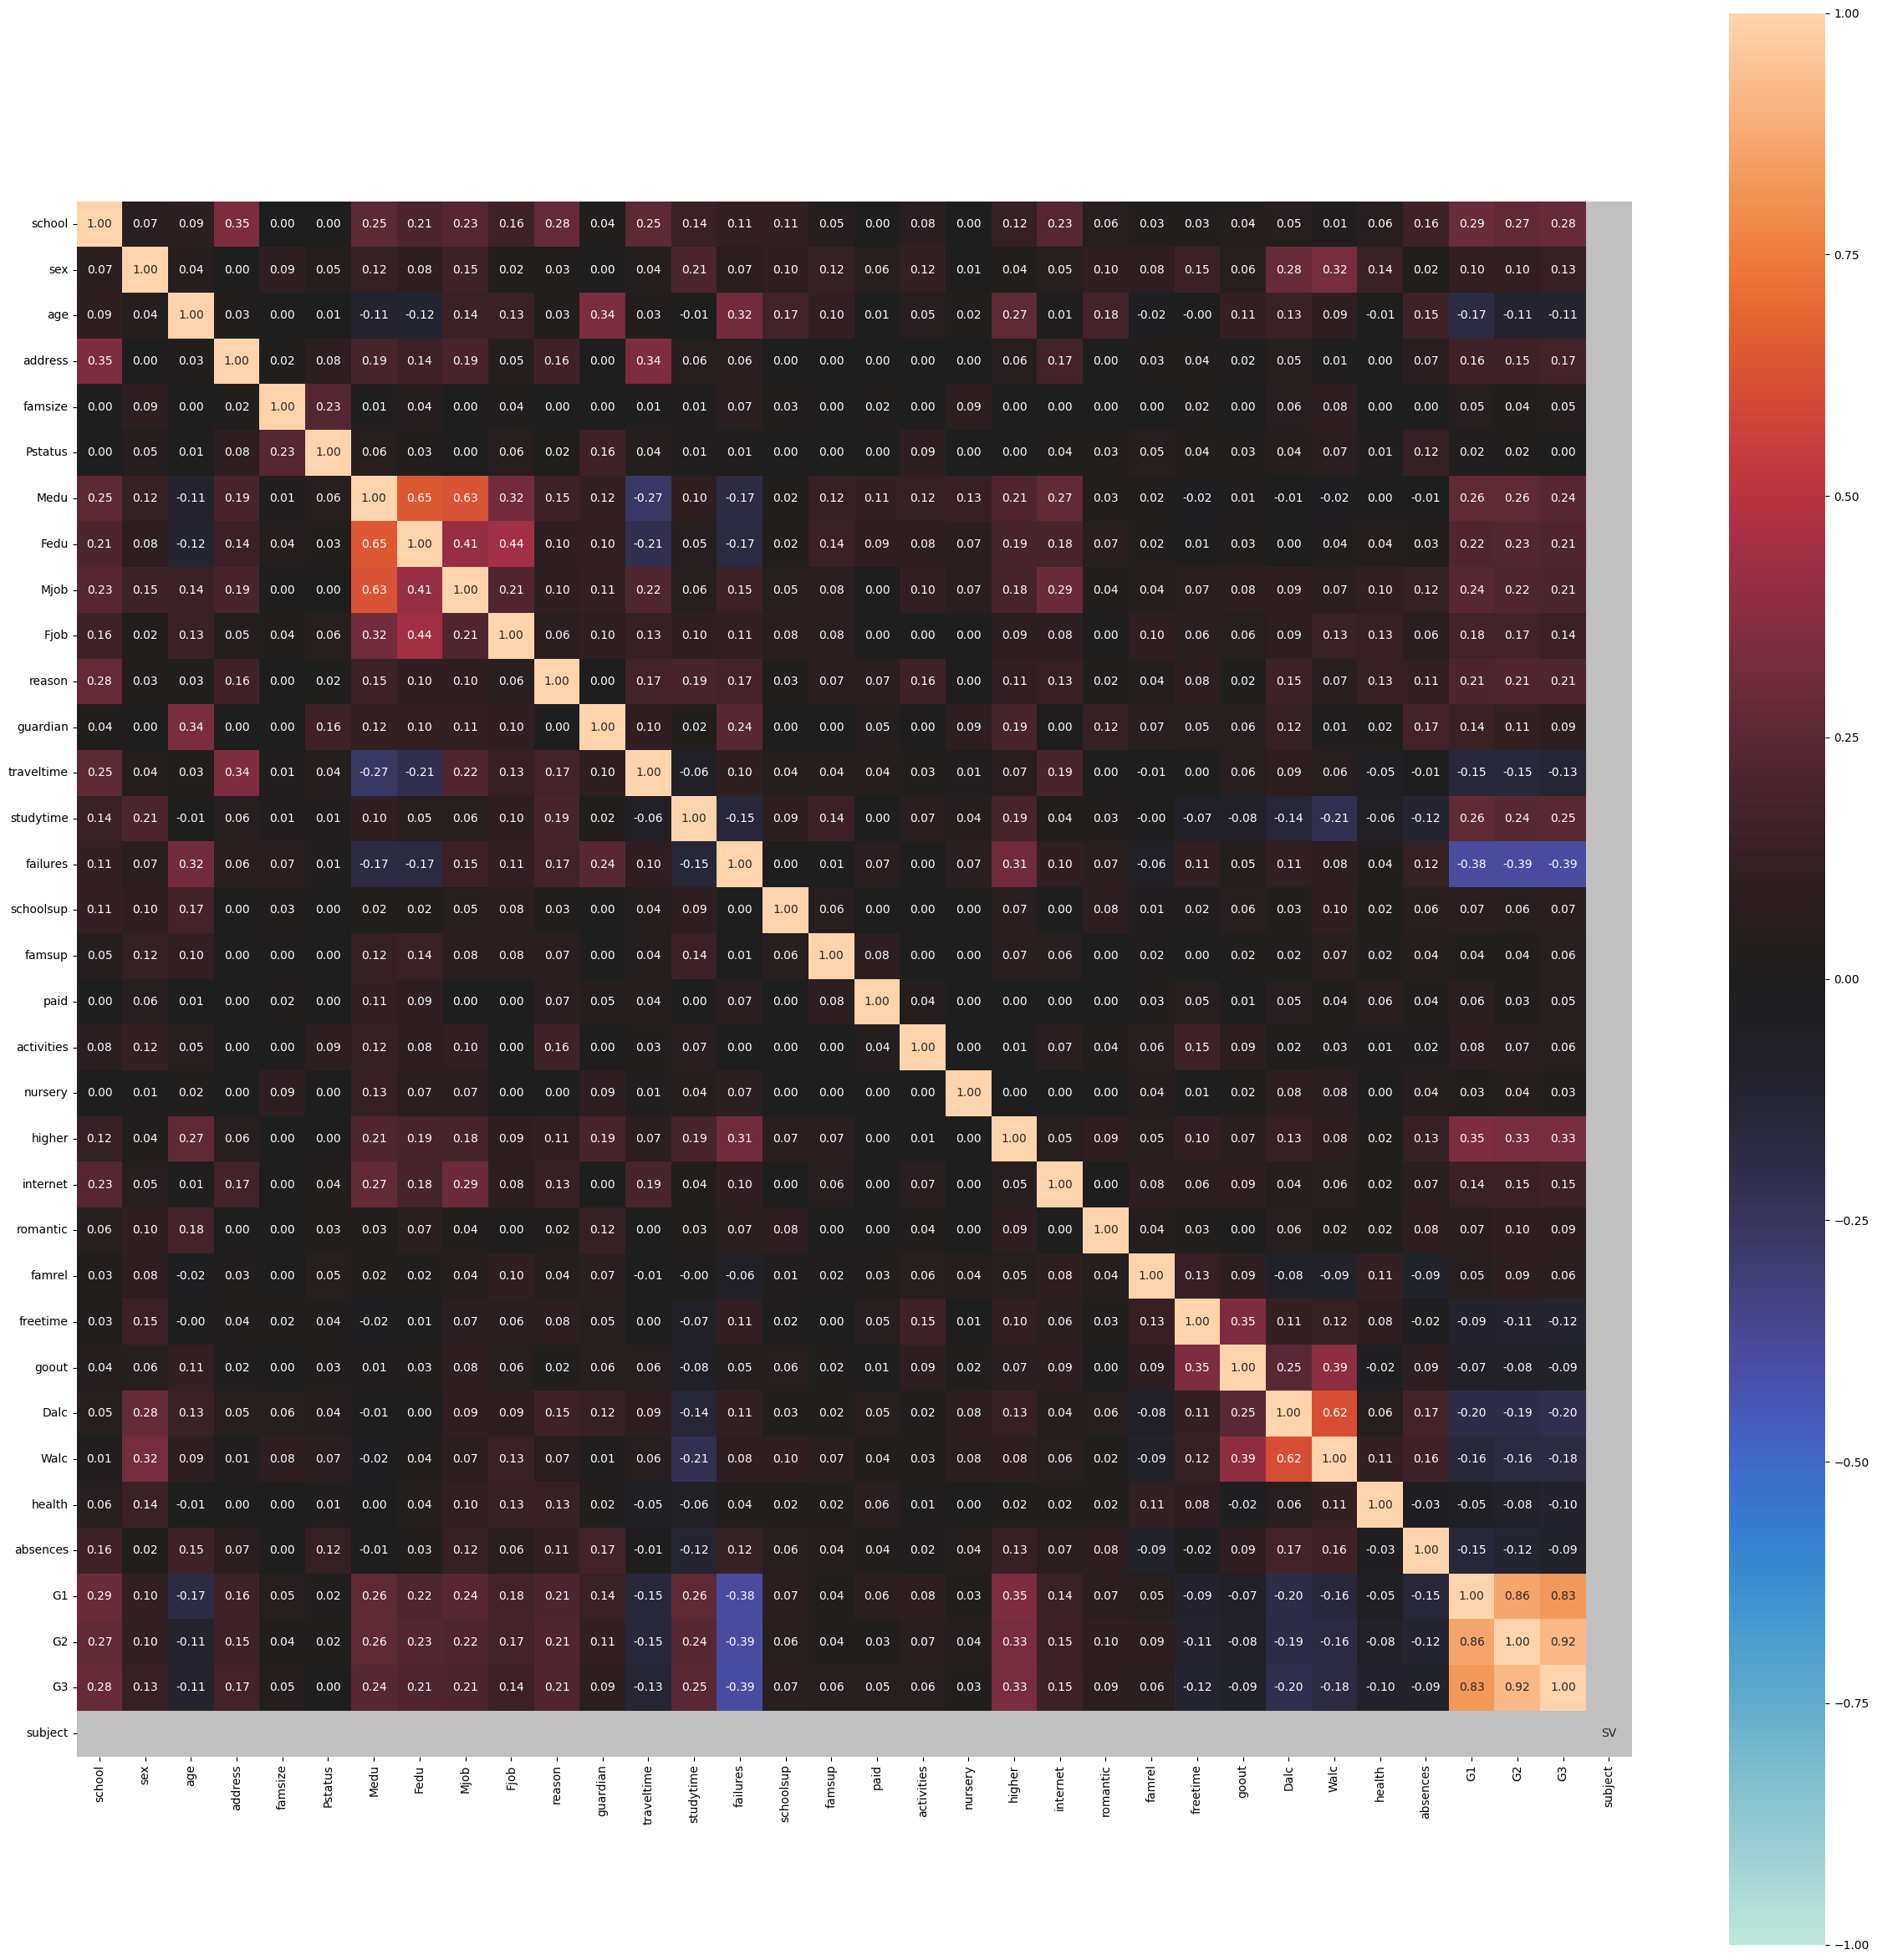

In [22]:
# 포르투갈 전체 상관관계 히트맵
complete_correlation = associations(pot_eda_df, filename='./corr_png/mat_correlation.png', figsize=(30, 30))

In [23]:
# Dalc와 featurer간의 상관관계
complete_correlation['corr'].sort_values(by='Dalc', ascending=False).style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
Dalc,0.05,0.28,0.13,0.05,0.06,0.04,-0.01,0.00,0.09,0.09,0.15,0.12,0.09,-0.14,0.11,0.03,0.02,0.05,0.02,0.08,0.13,0.04,0.06,-0.08,0.11,0.25,1.00,0.62,0.06,0.17,-0.20,-0.19,-0.20,0.00
Walc,0.01,0.32,0.09,0.01,0.08,0.07,-0.02,0.04,0.07,0.13,0.07,0.01,0.06,-0.21,0.08,0.10,0.07,0.04,0.03,0.08,0.08,0.06,0.02,-0.09,0.12,0.39,0.62,1.00,0.11,0.16,-0.16,-0.16,-0.18,0.00
sex,0.07,1.00,0.04,0.00,0.09,0.05,0.12,0.08,0.15,0.02,0.03,0.00,0.04,0.21,0.07,0.10,0.12,0.06,0.12,0.01,0.04,0.05,0.10,0.08,0.15,0.06,0.28,0.32,0.14,0.02,0.10,0.10,0.13,0.00
goout,0.04,0.06,0.11,0.02,0.00,0.03,0.01,0.03,0.08,0.06,0.02,0.06,0.06,-0.08,0.05,0.06,0.02,0.01,0.09,0.02,0.07,0.09,0.00,0.09,0.35,1.00,0.25,0.39,-0.02,0.09,-0.07,-0.08,-0.09,0.00
absences,0.16,0.02,0.15,0.07,0.00,0.12,-0.01,0.03,0.12,0.06,0.11,0.17,-0.01,-0.12,0.12,0.06,0.04,0.04,0.02,0.04,0.13,0.07,0.08,-0.09,-0.02,0.09,0.17,0.16,-0.03,1.00,-0.15,-0.12,-0.09,0.00
reason,0.28,0.03,0.03,0.16,0.00,0.02,0.15,0.10,0.10,0.06,1.00,0.00,0.17,0.19,0.17,0.03,0.07,0.07,0.16,0.00,0.11,0.13,0.02,0.04,0.08,0.02,0.15,0.07,0.13,0.11,0.21,0.21,0.21,0.00
age,0.09,0.04,1.00,0.03,0.00,0.01,-0.11,-0.12,0.14,0.13,0.03,0.34,0.03,-0.01,0.32,0.17,0.10,0.01,0.05,0.02,0.27,0.01,0.18,-0.02,-0.00,0.11,0.13,0.09,-0.01,0.15,-0.17,-0.11,-0.11,0.00
higher,0.12,0.04,0.27,0.06,0.00,0.00,0.21,0.19,0.18,0.09,0.11,0.19,0.07,0.19,0.31,0.07,0.07,0.00,0.01,0.00,1.00,0.05,0.09,0.05,0.10,0.07,0.13,0.08,0.02,0.13,0.35,0.33,0.33,0.00
guardian,0.04,0.00,0.34,0.00,0.00,0.16,0.12,0.10,0.11,0.10,0.00,1.00,0.10,0.02,0.24,0.00,0.00,0.05,0.00,0.09,0.19,0.00,0.12,0.07,0.05,0.06,0.12,0.01,0.02,0.17,0.14,0.11,0.09,0.00
freetime,0.03,0.15,-0.00,0.04,0.02,0.04,-0.02,0.01,0.07,0.06,0.08,0.05,0.00,-0.07,0.11,0.02,0.00,0.05,0.15,0.01,0.10,0.06,0.03,0.13,1.00,0.35,0.11,0.12,0.08,-0.02,-0.09,-0.11,-0.12,0.00


In [24]:
# 상관관계 오름차순 정렬
corr_df = complete_correlation['corr'].sort_values(by='Dalc', ascending=False)

In [25]:
px.bar(corr_df, x='Dalc')

## 수학성적 데이터와 포르투칼 데이터 합친 상관관계

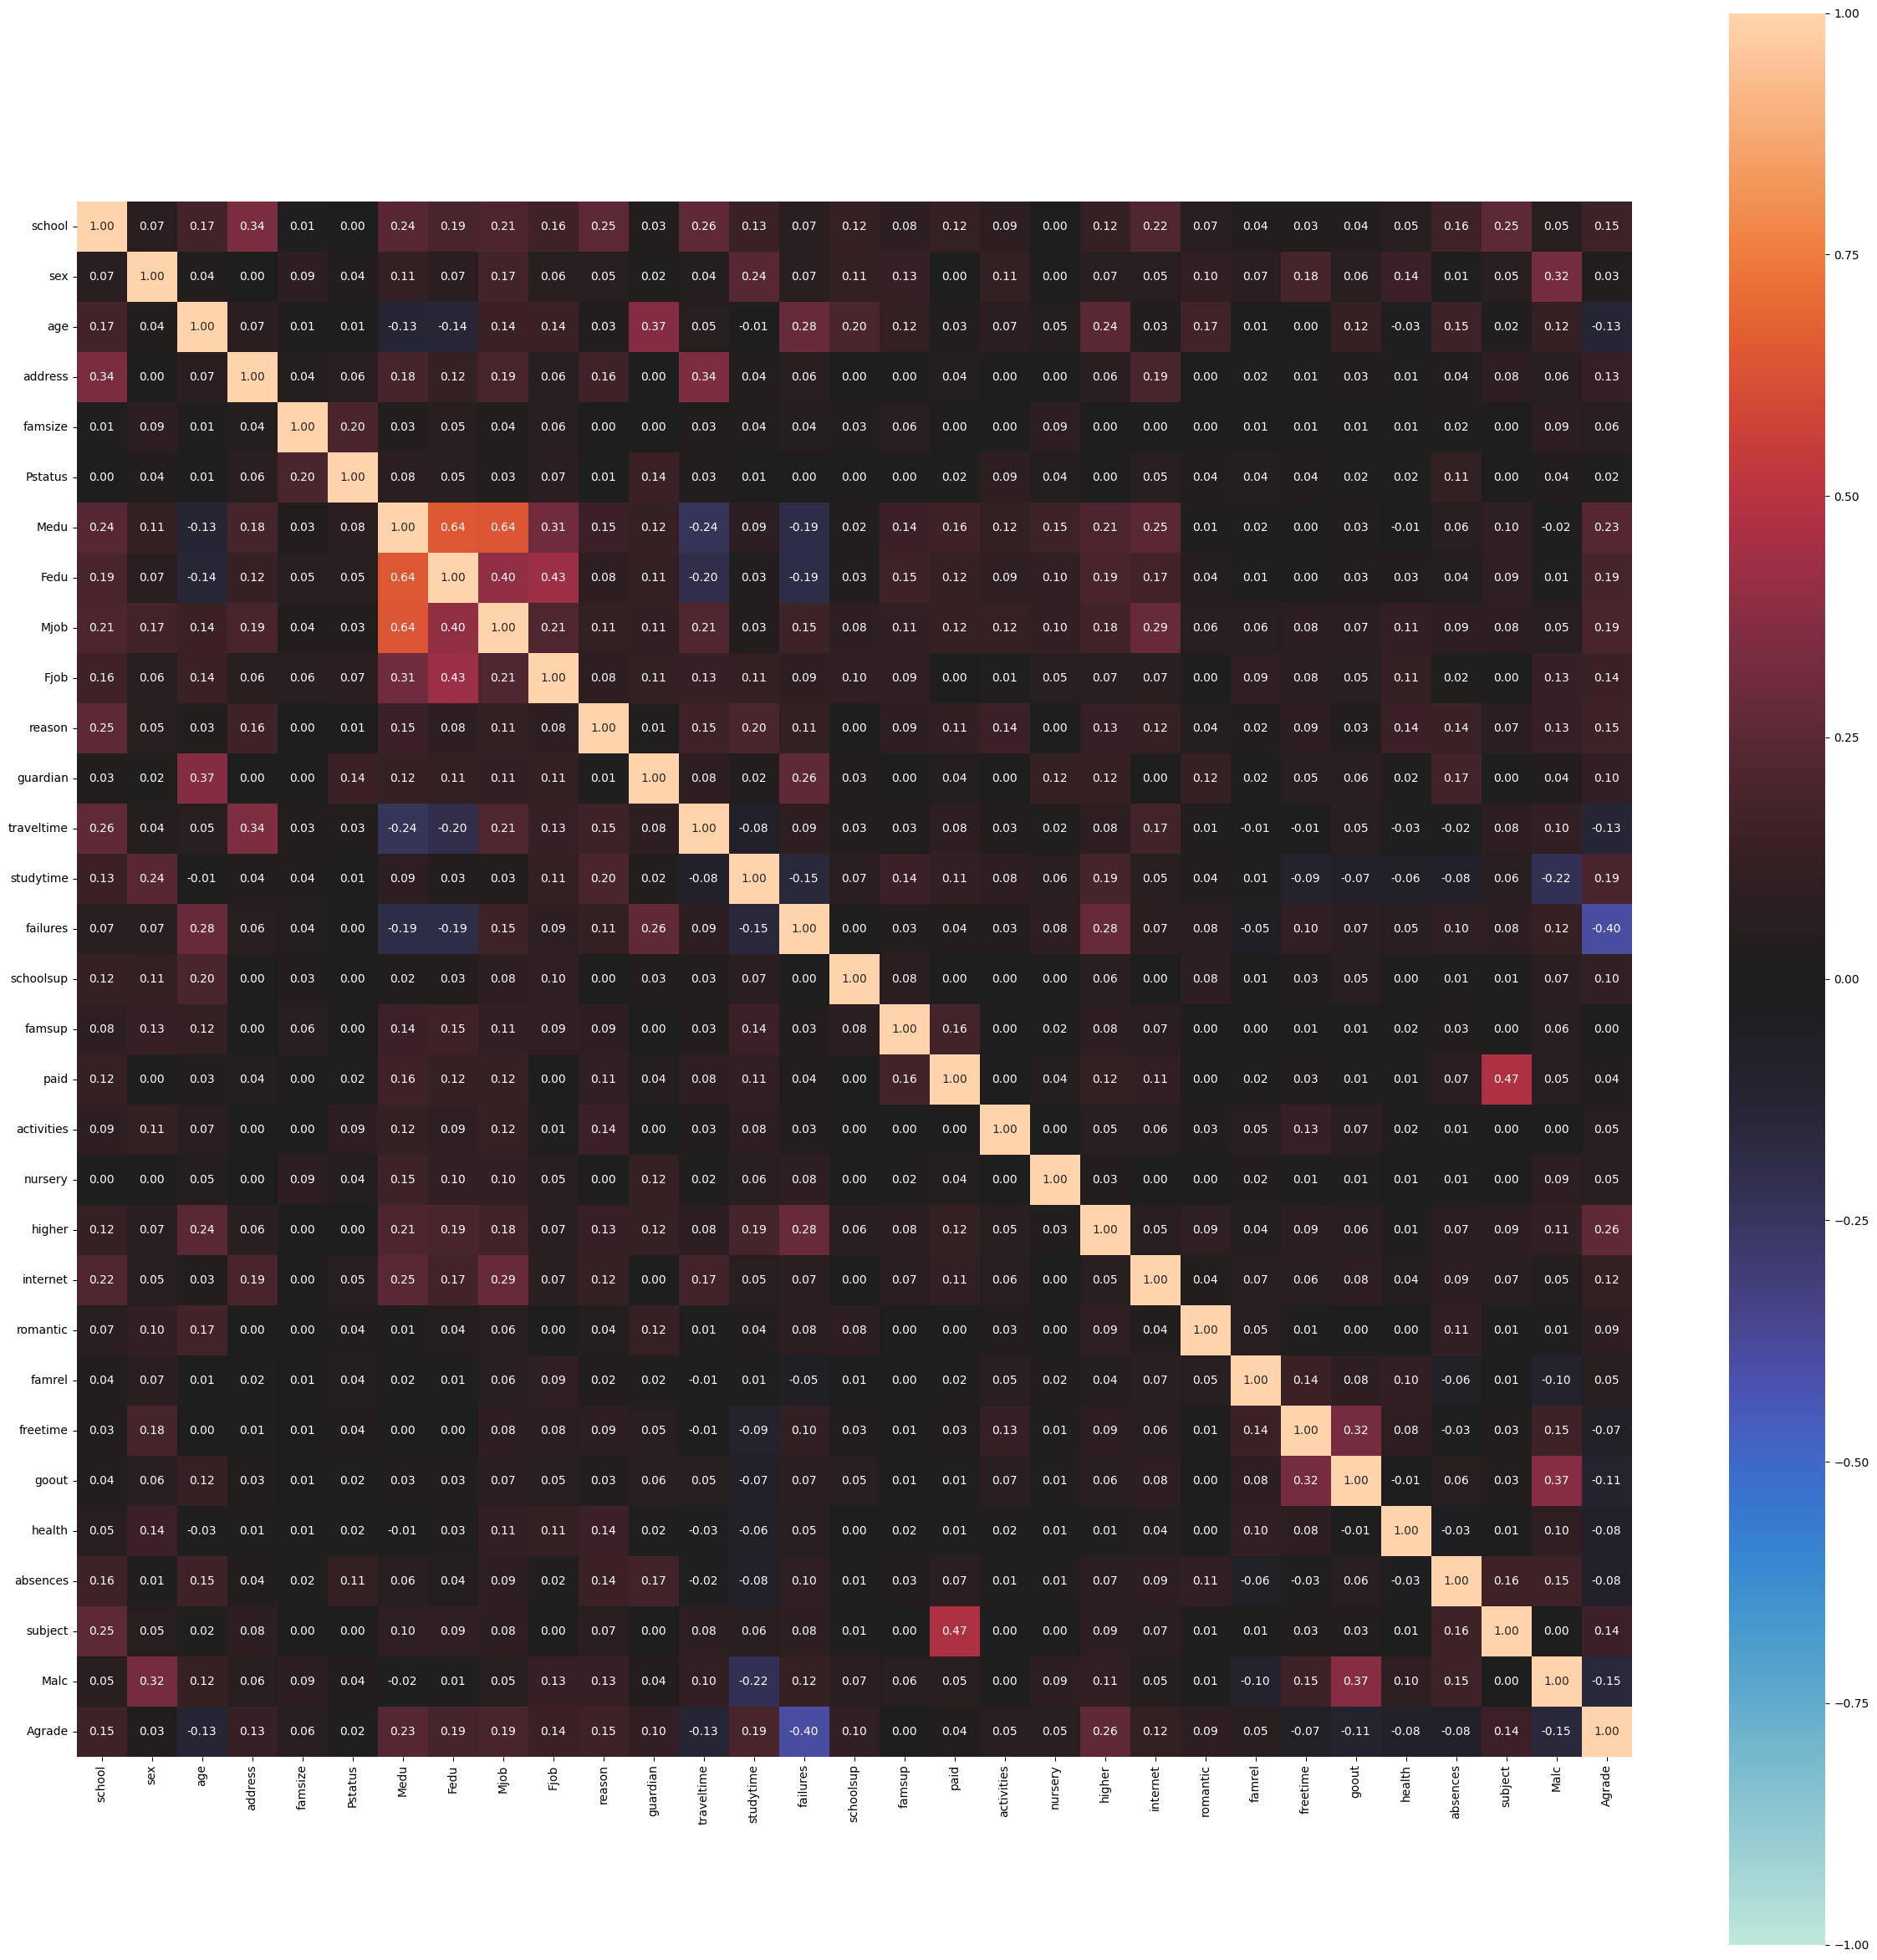

In [26]:
complete_correlation = associations(concat_df, filename='./corr_png/concat_corr.png', figsize=(30, 30))

In [27]:
corr_df = complete_correlation['corr'].sort_values(by='Malc', ascending=False)

In [28]:
px.bar(corr_df, x='Malc')

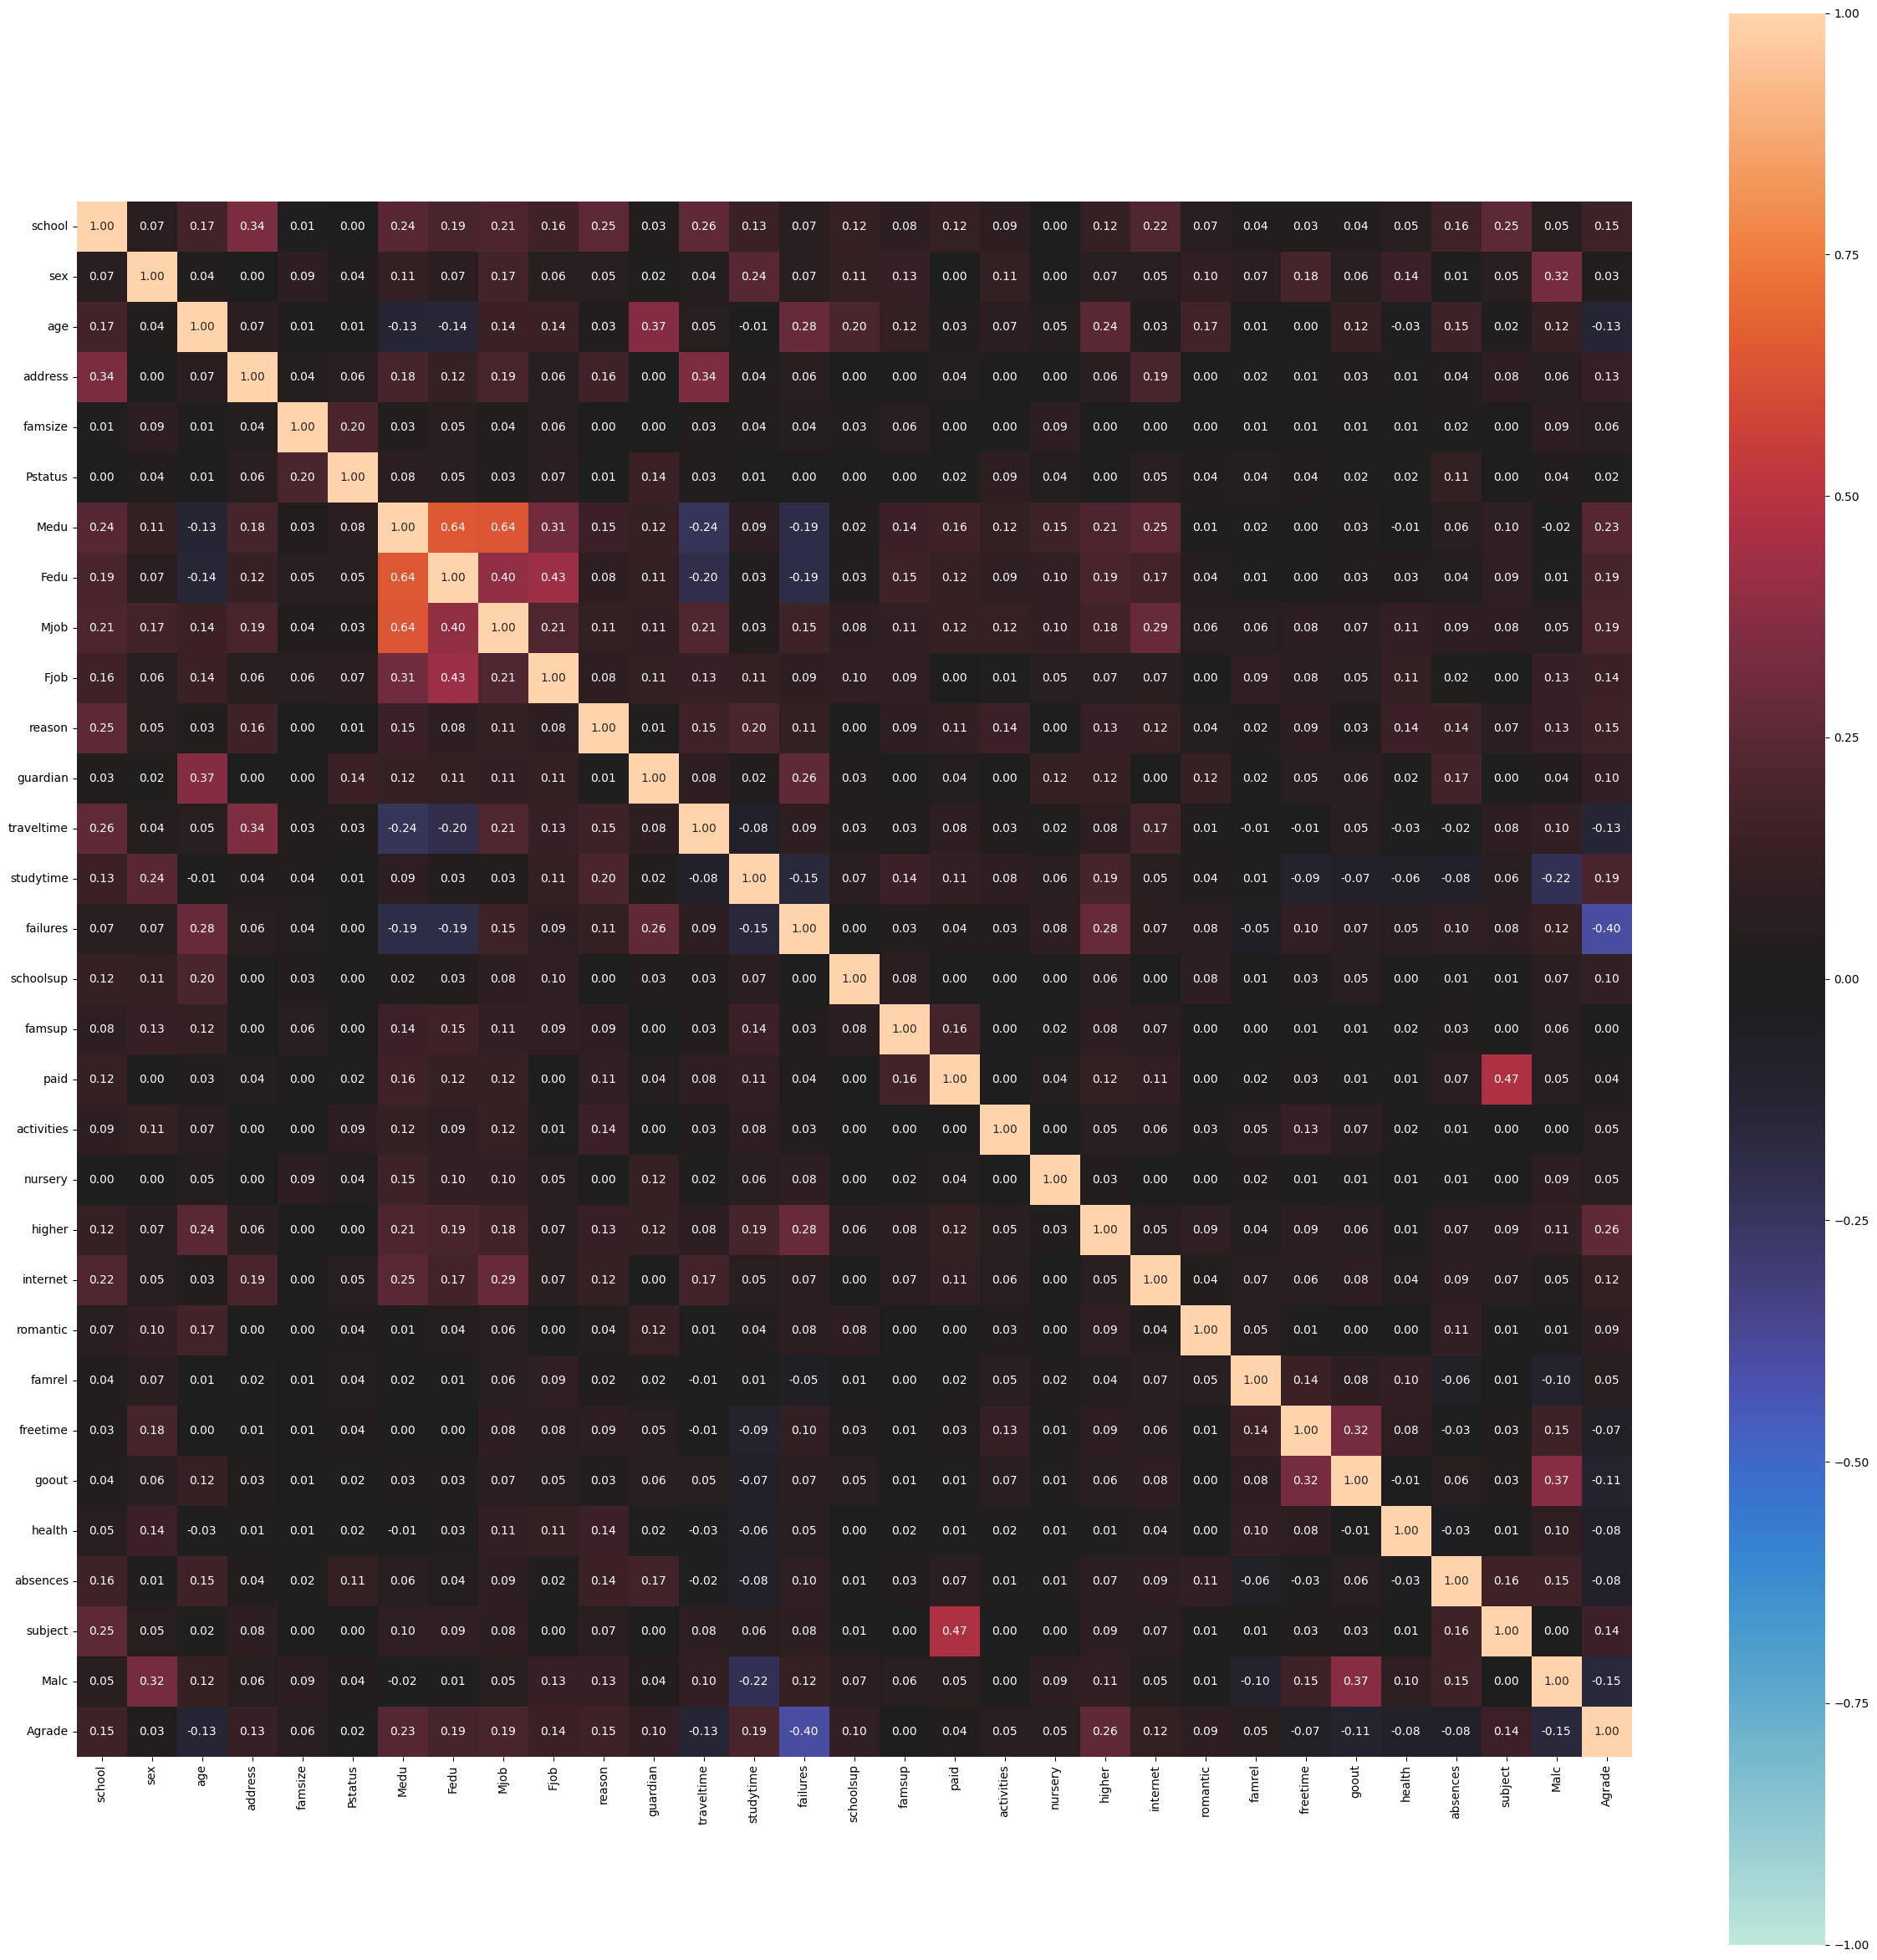

In [29]:
complete_correlation = associations(concat_df, filename='./corr_png/concat_corr2.png', figsize=(30, 30))

In [30]:
complete_correlation['corr'].sort_values(by='Malc', ascending=False).style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,subject,Malc,Agrade
Malc,0.047,0.322,0.125,0.057,0.093,0.038,-0.018,0.013,0.052,0.132,0.127,0.038,0.105,-0.221,0.123,0.072,0.058,0.047,0.001,0.092,0.108,0.046,0.010,-0.100,0.151,0.374,0.099,0.151,0.003,1.000,-0.152
goout,0.037,0.063,0.119,0.031,0.006,0.020,0.026,0.030,0.075,0.051,0.029,0.065,0.050,-0.073,0.075,0.051,0.005,0.013,0.072,0.014,0.063,0.084,0.004,0.081,0.324,1.000,-0.014,0.056,0.032,0.374,-0.107
sex,0.066,1.000,0.039,0.000,0.087,0.037,0.109,0.071,0.174,0.060,0.055,0.021,0.043,0.240,0.066,0.112,0.132,0.000,0.110,0.000,0.069,0.052,0.102,0.075,0.182,0.063,0.141,0.013,0.052,0.322,0.029
absences,0.155,0.013,0.153,0.037,0.018,0.114,0.060,0.041,0.087,0.023,0.140,0.169,-0.023,-0.076,0.100,0.009,0.031,0.071,0.010,0.011,0.073,0.091,0.105,-0.062,-0.032,0.056,-0.027,1.000,0.160,0.151,-0.077
freetime,0.026,0.182,0.003,0.010,0.007,0.039,0.001,0.002,0.085,0.077,0.087,0.055,-0.007,-0.094,0.103,0.026,0.006,0.035,0.129,0.014,0.087,0.061,0.012,0.137,1.000,0.324,0.082,-0.032,0.026,0.151,-0.065
Fjob,0.157,0.060,0.138,0.059,0.060,0.072,0.305,0.429,0.213,1.000,0.082,0.114,0.126,0.114,0.089,0.097,0.094,0.000,0.011,0.051,0.070,0.066,0.000,0.095,0.077,0.051,0.111,0.023,0.000,0.132,0.138
reason,0.254,0.055,0.026,0.159,0.000,0.007,0.146,0.084,0.112,0.082,1.000,0.011,0.154,0.199,0.110,0.000,0.092,0.106,0.142,0.000,0.128,0.118,0.040,0.025,0.087,0.029,0.142,0.140,0.071,0.127,0.149
age,0.170,0.039,1.000,0.071,0.013,0.007,-0.130,-0.139,0.135,0.138,0.026,0.365,0.049,-0.008,0.282,0.203,0.117,0.028,0.074,0.047,0.245,0.033,0.174,0.007,0.003,0.119,-0.029,0.153,0.019,0.125,-0.129
failures,0.067,0.066,0.282,0.061,0.045,0.005,-0.188,-0.191,0.152,0.089,0.110,0.263,0.087,-0.152,1.000,0.002,0.028,0.036,0.028,0.083,0.285,0.074,0.076,-0.054,0.103,0.075,0.048,0.100,0.083,0.123,-0.397
higher,0.124,0.069,0.245,0.064,0.000,0.000,0.207,0.192,0.179,0.070,0.128,0.124,0.082,0.187,0.285,0.065,0.079,0.116,0.049,0.026,1.000,0.050,0.095,0.042,0.087,0.063,0.008,0.073,0.088,0.108,0.264


In [31]:
px.bar(corr_df, x='Malc')

In [32]:
# 상관계수를 절대값을 해준 후 데이터 프레임 만들기
abs_df = corr_df.Malc.abs().to_frame('corr_score').corr_score.nlargest(31).to_frame('score')

- 음의 상관관계도 포함

In [33]:
abs_df.reset_index(inplace=True)

In [34]:
choice_col_list_df = abs_df.head(17)

In [35]:
choice_col_list_df

,index,score
0,Malc,1.00
1,goout,0.37
2,sex,0.32
3,studytime,0.22
4,Agrade,0.15
5,absences,0.15
6,freetime,0.15
7,Fjob,0.13
8,reason,0.13
9,age,0.12


---

### 최종 상관계수

In [36]:
Malc_df = corr_df[['Malc']]

In [37]:
Malc_df.reset_index(inplace=True)

In [38]:
pos_14_corr_df = Malc_df.head(14)

In [39]:
neg_4_corr_df = Malc_df.tail(3)

In [40]:
most_corr_df= pd.concat([pos_14_corr_df, neg_4_corr_df],axis=0)

In [41]:
most_corr_df.columns = ['features', 'score']

In [42]:
most_corr_df.reset_index(inplace=True)

In [43]:
most_corr_df.drop('index', inplace=True, axis=1)

In [44]:
most_corr_df

,features,score
0,Malc,1.00
1,goout,0.37
2,sex,0.32
3,absences,0.15
4,freetime,0.15
5,Fjob,0.13
6,reason,0.13
7,age,0.12
8,failures,0.12
9,higher,0.11


---

#### 일 소비량과 주말 소비량을 합쳐서 본 히트맵
학업에서 성공하는 비결은 술??????
- 술 마시면 자신감이 배가 되어 시험을 잘 본다는 것이 학계의 정설!!



- 술을 마신다고 해서 성적과 연관이 있을까? -> 결과적으로 술을 마시는 행위 자체가 일탈이라고 볼 수 있을까? -> 성적이 높다고 하여 모범생??????
- 부모님의 교육 여부에 따라 술 소비량이 달라질까?
- 나이가 많다고 해서 술을 많이 마실까?
- 학교별로 나누어서 술 소비량이 성적에 미치는 것을 구별해야 할까?
- 그럼 술을 많이 마시게 되는 요인이 무엇이 될까?
  - 학교 환경
  - 나가서 놀기
  - 나이
  - 부모님의 교육상태
  - 여가시간
  - 공부시간???
  - 건강
  - 결석
  - 성적?
  - 과목? 근데 수학을 선택했다면 누칼협아님?

- 용정 : 'failures', 'freetime', 'Fjob', AGrade
- 종호 : 'studytime', 'sex', 'age', 'reason'
- 정원 : 'goout', famrel, 'absences', 'health'

- Medu, famrel, AGrade, studytime

## 범주형 변수 수치형변수로 변환하기

In [45]:
def init_mapping(data, col_ls):
    """_summary_

    Args:
        data (DataFrame): 변환하고자 하는 데이터 프레임
        col_name (list): 변환하고 하자는 데이터 프레임의 컬럼명을 리스트로 input
    """
    print('Start Mapping.......')
    print('-' * 50)
    for i in range(len(col_ls)):
        data_ls = data[col_ls[i]].unique()
        print('column name :', col_ls[i])
        num = []
        if len(data_ls) == 2:
            num = [i for i in range(len(data_ls))] # 번호 생성
        else:
            num = [i + 1 for i in range(len(data_ls))]
        ls = [(data_ls[i], num[i]) for i in range(len(data_ls))] # 해당 컬럼의 데이터 와 번호 리스트로 생성
        print(ls)
        mapping = dict(ls) # dict로 만듬
        data[col_ls[i]] = data[col_ls[i]].apply(lambda x: mapping[x]) # mapping 적용

In [46]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      1044 non-null   object 
 1   sex         1044 non-null   object 
 2   age         1044 non-null   int64  
 3   address     1044 non-null   object 
 4   famsize     1044 non-null   object 
 5   Pstatus     1044 non-null   object 
 6   Medu        1044 non-null   int64  
 7   Fedu        1044 non-null   int64  
 8   Mjob        1044 non-null   object 
 9   Fjob        1044 non-null   object 
 10  reason      1044 non-null   object 
 11  guardian    1044 non-null   object 
 12  traveltime  1044 non-null   int64  
 13  studytime   1044 non-null   int64  
 14  failures    1044 non-null   int64  
 15  schoolsup   1044 non-null   object 
 16  famsup      1044 non-null   object 
 17  paid        1044 non-null   object 
 18  activities  1044 non-null   object 
 19  nursery     1044 non-null  

In [47]:
# Fjob은 unique의 순서가 달라 따로 맵핑함
mapping = {
    'at_home' : 1,
    'health' : 2,
    'other' : 3, 
    'services': 4,
    'teacher' : 5
}
concat_df['Fjob'] = concat_df['Fjob'].apply(lambda x: mapping[x])

In [48]:
mapping = {
    'yes' : 1,
    'no' :0
}
concat_df['schoolsup'] = concat_df['schoolsup'].apply(lambda x: mapping[x])
concat_df['nursery'] = concat_df['nursery'].apply(lambda x: mapping[x])
concat_df['higher'] = concat_df['higher'].apply(lambda x: mapping[x])

In [49]:
col_ls = [
    'school', 'sex', 'address', 'famsize', 
    'Pstatus', 'Mjob', 'reason', 'guardian', 
    'famsup', 'paid', 'activities', 'internet', 
    'romantic', 'subject'
    ]

In [50]:
init_mapping(concat_df, col_ls)

Start Mapping.......
--------------------------------------------------
column name : school
[('GP', 0), ('MS', 1)]
column name : sex
[('F', 0), ('M', 1)]
column name : address
[('U', 0), ('R', 1)]
column name : famsize
[('GT3', 0), ('LE3', 1)]
column name : Pstatus
[('A', 0), ('T', 1)]
column name : Mjob
[('at_home', 1), ('health', 2), ('other', 3), ('services', 4), ('teacher', 5)]
column name : reason
[('course', 1), ('other', 2), ('home', 3), ('reputation', 4)]
column name : guardian
[('mother', 1), ('father', 2), ('other', 3)]
column name : famsup
[('no', 0), ('yes', 1)]
column name : paid
[('no', 0), ('yes', 1)]
column name : activities
[('no', 0), ('yes', 1)]
column name : internet
[('no', 0), ('yes', 1)]
column name : romantic
[('no', 0), ('yes', 1)]
column name : subject
[('M', 0), ('P', 1)]


In [51]:
concat_df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,subject,Malc,Agrade
0,0,0,18,0,0,0,4,4,1,5,1,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,3,6,0,1.00,5.67
1,0,0,17,0,0,1,1,1,1,3,1,2,1,2,0,0,1,0,0,0,1,1,0,5,3,3,3,4,0,1.00,5.33
2,0,0,15,0,1,1,1,1,1,3,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,3,10,0,2.50,8.33
3,0,0,15,0,0,1,4,2,2,4,3,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,5,2,0,1.00,14.67
4,0,0,16,0,0,1,3,3,3,3,3,2,1,2,0,0,1,1,0,1,1,0,0,4,3,2,5,4,0,1.50,8.67
5,0,1,16,0,1,1,4,3,4,3,4,1,1,2,0,0,1,1,1,1,1,1,0,5,4,2,5,10,0,1.50,15.00
6,0,1,16,0,1,1,2,2,3,3,3,1,1,2,0,0,0,0,0,1,1,1,0,4,4,4,3,0,0,1.00,11.67
7,0,0,17,0,0,0,4,4,3,5,3,1,2,2,0,1,1,0,0,1,1,0,0,4,1,4,1,6,0,1.00,5.67
8,0,1,15,0,1,0,3,2,4,3,3,1,1,2,0,0,1,1,0,1,1,1,0,4,2,2,1,0,0,1.00,17.67
9,0,1,15,0,0,1,3,4,3,3,3,1,1,2,0,0,1,1,1,1,1,1,0,5,5,1,5,0,0,1.00,14.67


In [52]:
concat_df.to_csv('~/desktop/git/hakcerton/data/preprocessing/final_data.csv', index=False)

------------------------------------------------------------------------------------------------

In [53]:
#필요데이터: 
    # Dalc
    # Walc
    # Malc 우선 이거부터

    # studytime
    # sex
    # age
    # reason

df_new = concat_df.iloc[:,[1,2,10,13,29]]
df_new.head(-10)


,sex,age,reason,studytime,Malc
0,0,18,1,2,1.00
1,0,17,1,2,1.00
2,0,15,2,2,2.50
3,0,15,3,3,1.00
4,0,16,3,2,1.50
...,...,...,...,...,...
1029,0,18,3,2,1.50
1030,0,17,4,2,2.50
1031,1,18,3,2,2.50
1032,1,18,2,1,2.00


-------------

# 기본정보 시각화

- 성별 수
- 나이 수
- 공부시간
- 학교 다니는 이유

### 1. 성별 수

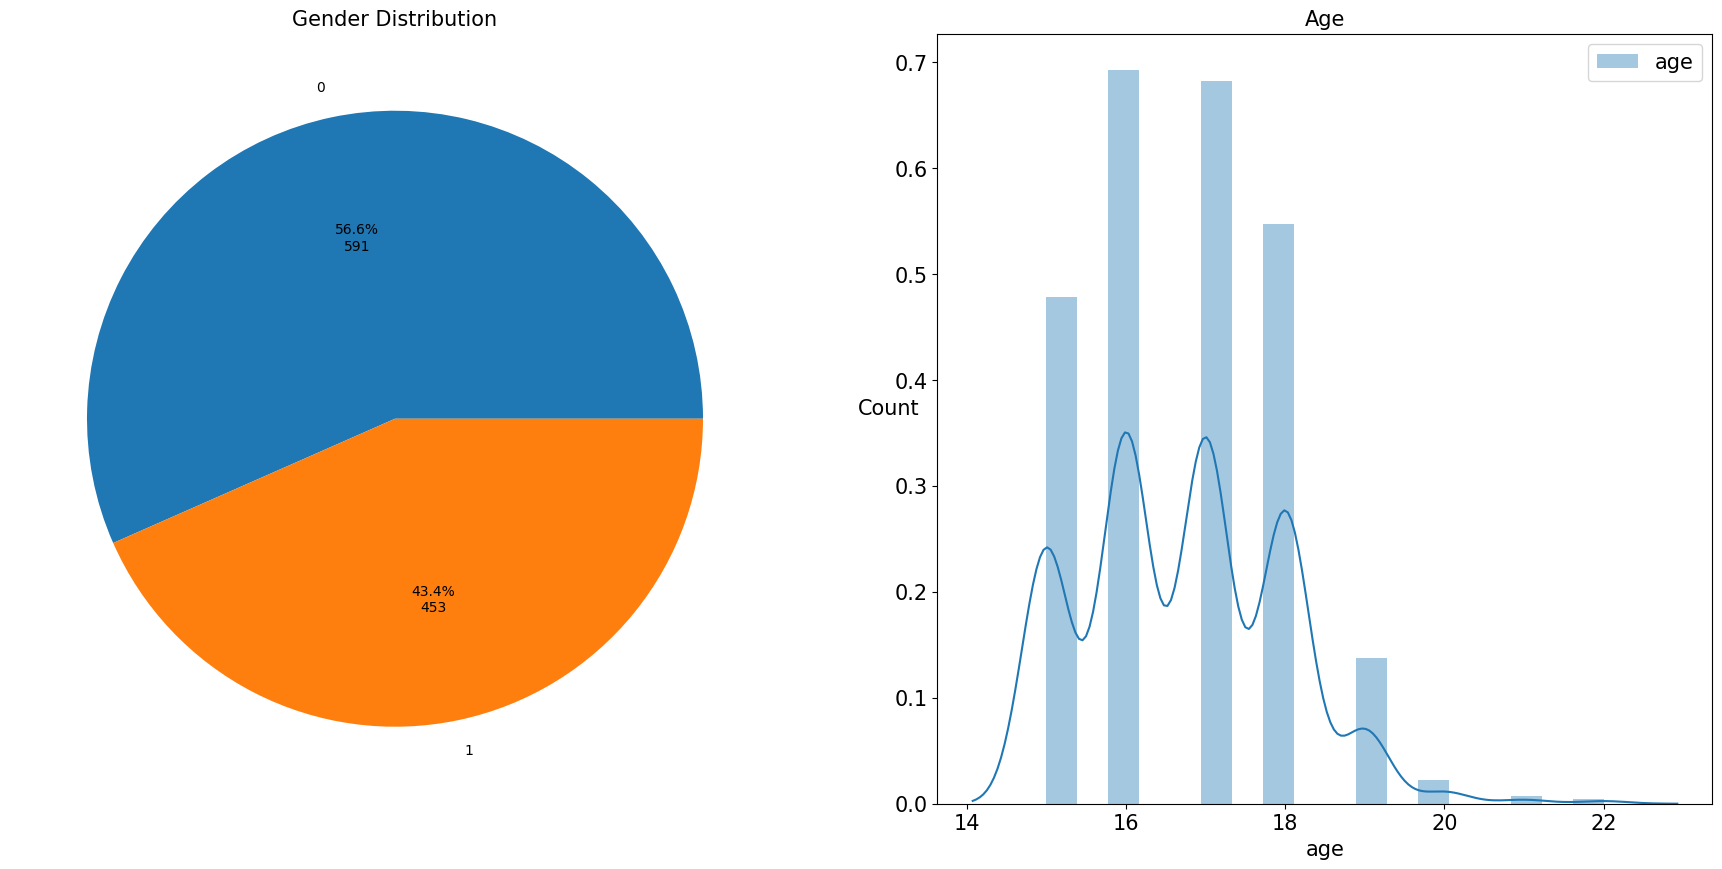

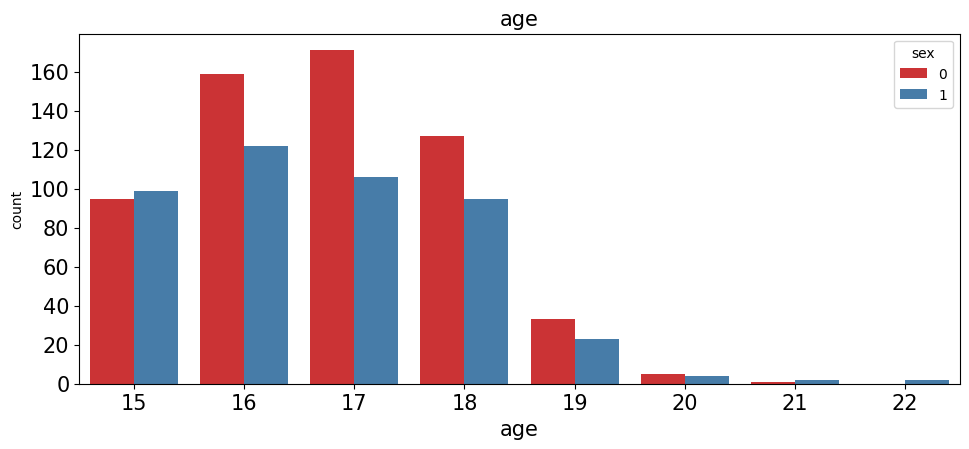

In [227]:


plt.figure(figsize = (22,22))
plt.subplot(221)
data = df_new
labels = 'sex'
colors = sns.color_palette('Set1')[0:5]
# sns.barplot(x='studytime', y='Malc', data=df_new, palette='Set1')
palette='Set1'
total = df_new['sex'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.title('Gender Distribution', size=15)
plt.pie(df_new['sex'].value_counts().values, labels=df_new['sex'].value_counts().index, autopct=fmt)


plt.subplot(222)
sns.distplot(df_new['age'], label='age')
plt.legend(loc='upper right', fontsize=15)
plt.title('Age', size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('age', fontsize=15)
plt.ylabel('Count', rotation=0, fontsize=15)


plt.figure(figsize = (25,10))
plt.subplot(223)
sns.countplot(x = 'age', hue = 'sex',data=df_new, palette='Set1')
plt.title('age', size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('age', fontsize=15)

plt.show()

# 0 과1 대신 성별을 넣는방법은?

### 참여자 조사

조사에 참여한 학생은 총 1,044명으로 여학생 56.6% (숫자 0), 남학생 43.4% (숫자 1)로 여학생 참여자가 남학생 참여자보다 많았다. 
참여자들은 모두 15세에서 22세 사이의 연령대였으며 모든 성별에서 16세에서 17세 사이에 가장 큰 분포를 보이고 있다.

### - Studytime & Reason

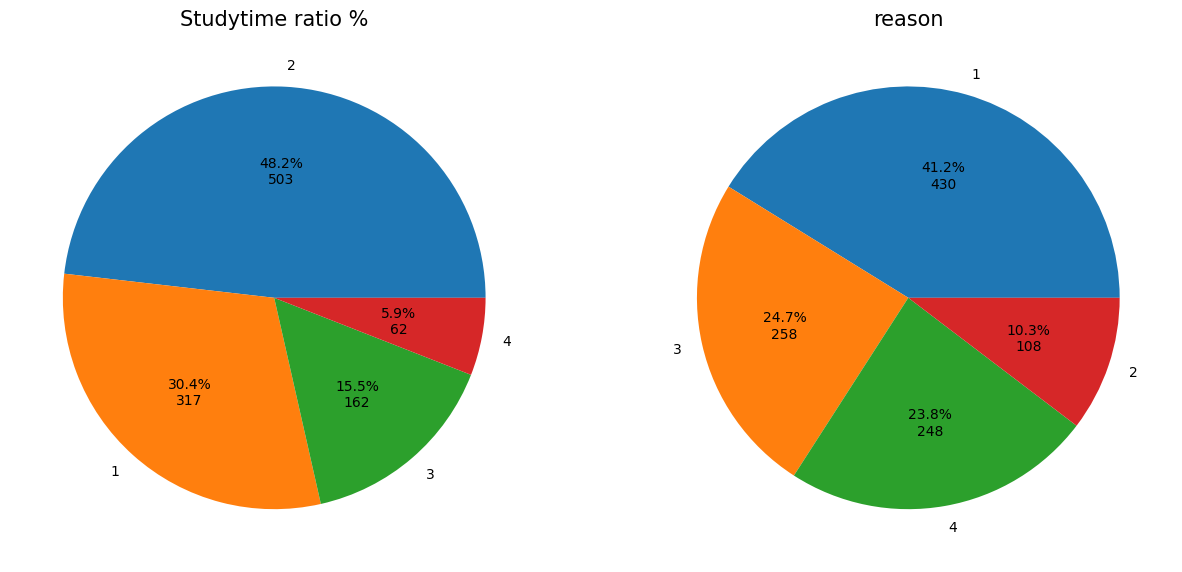

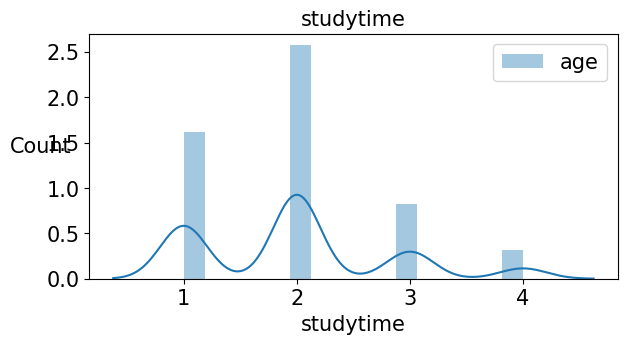

In [268]:
plt.figure(figsize = (15,25))

plt.subplot(221)
data = df_new
labels = 'studytime'
# colors = sns.color_palette('bright')[0:5]
total = df_new['studytime'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.title('Studytime ratio %', size=15)
plt.pie(df_new['studytime'].value_counts().values, labels=df_new['studytime'].value_counts().index, autopct=fmt)


plt.subplot(222)
data = df_new
labels = 'reason'
# colors = sns.color_palette('bright')[0:5]
total = df_new['reason'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.title('reason', size=15)
plt.pie(df_new['reason'].value_counts().values, labels=df_new['reason'].value_counts().index, autopct=fmt)

plt.figure(figsize = (15,7))
plt.subplot(223)
sns.distplot(df_new['studytime'], label='age')
plt.legend(loc='upper right', fontsize=15)
plt.title('studytime', size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('studytime', fontsize=15)
plt.ylabel('Count', rotation=0, fontsize=15)

plt.show()

# 두개 색깔 같게 하려면?

공부시간 :  
- 1 - <2 hours, 
- 2 - 2 to 5 hours, 
- 3 - 5 to 10 hours 
- 4 - >10 hours
<br/>

학교를 다니는 이유:
- 'course' -  1
- 'other' -  2
- 'home' -  3
- 'reputation' -  4

<br/>



설문조사에 따르면 전체 학생중 공부시간은 2~5시간하는 학생이 약 48.2%로 가장 높은 비율을 보였으며 그다음은 2시간 미만 30.4%, 5~10시간 15.5%, 그리고 10시간 이상 5.9% 순으로 비율이 높았다.

현재 다니고 있는 학교를 선택한 이유에 대해서 가장 높은 비율인 41.2%의 학생이 특정 과목 선호(1)로 가장 높은 비율을 보였으며 그다음으론 집에서 가까운 이유와 학교의 명성이 각각 24.7%와 23.8%로 비슷한 반응을 보였고 마지막으로 기타이유가 10.3%의 반응을 보였다

# 데이터 상관관계 분석

## Point 1) 공부시간과 음주 빈도수의 상관관계

위 데이터 분석을 통해 전체 음주 빈도와 공부시간은 서로 음의 상관계수 (-0.22)를 보이고있다.
</br>
즉 공부 시간이 줄어들수록 음주 빈도수가 늘어나며 공부 시간이 늘어날수록 음주 빈도수가 줄어든다고 가정해 볼 수 있다.
</br>
좀 더 자세하고 시각적인 정보 분석을 위해서 그래프로 나타내보았다.

### 1. 공부시간 - 음주빈도수

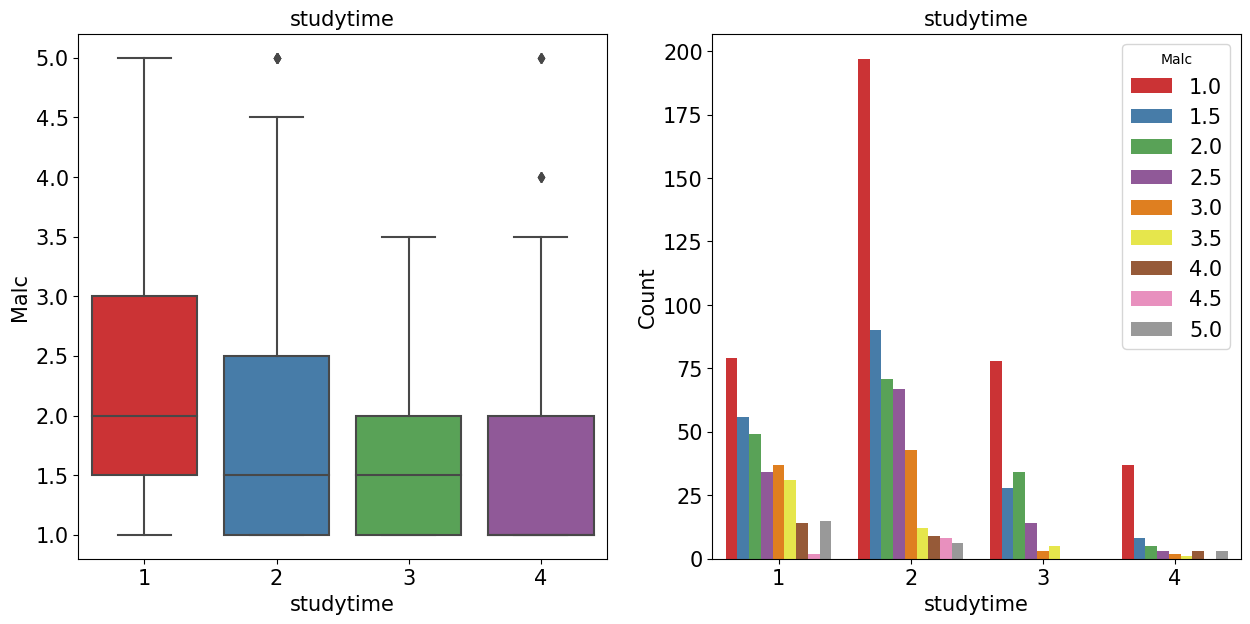

In [251]:
plt.figure(figsize = (15,15))

# plt.subplot(221)
# sns.barplot(x='studytime', y='Malc', data=df_new, palette='Set1')
# plt.title('Studytime & Malc', size=15)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.xlabel('studytime', fontsize=15)
# plt.ylabel('Malc', fontsize=15)

plt.subplot(221)
sns.boxplot(x = 'studytime', y = 'Malc',data=df_new,
            palette='Set1')
plt.title('studytime', size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('studytime', fontsize=15)
plt.ylabel('Malc', fontsize=15)

plt.subplot(222)
sns.countplot(data=concat_df, x='studytime', hue='Malc', palette='Set1')
plt.legend(loc='upper right', title='Malc', fontsize=15)
plt.title('studytime', size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('studytime', fontsize=15)
plt.ylabel('Count',  fontsize=15)



plt.show()

위 그래프에서 확인해본 결과 공부시간이 적을수록 더 많은 전체 음주량을 보이고 있음이 확인되었다. 특히 공부시간이 올라갈 수록 몇몇 예외의 케이스를 제외하곤 전체적으로 음주량이 올라가는것을 확인할 수 있다.
<br/>
특히 4~5의 많은 음주량을 보이는 학생 대다수의 학습시간은 1~2, 즉 0~5시간 사이의 학습시간을 가지고 있음이 나타났다.

### 2. 성별 - 음주 빈도수 
- 상관계수 0.32

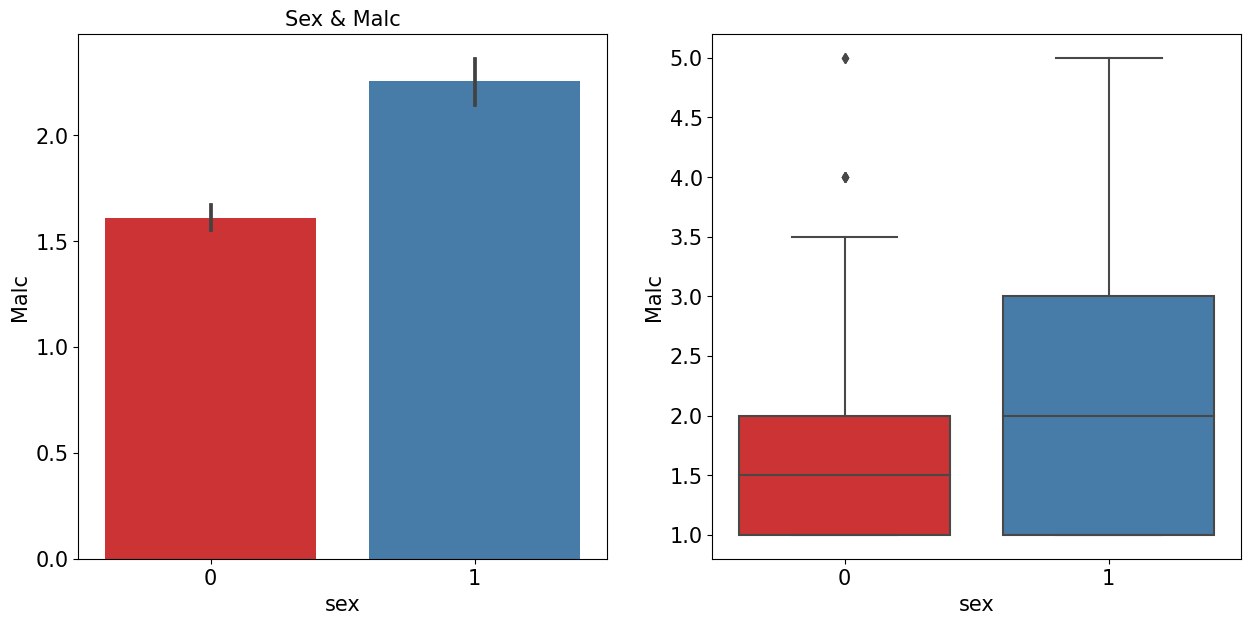

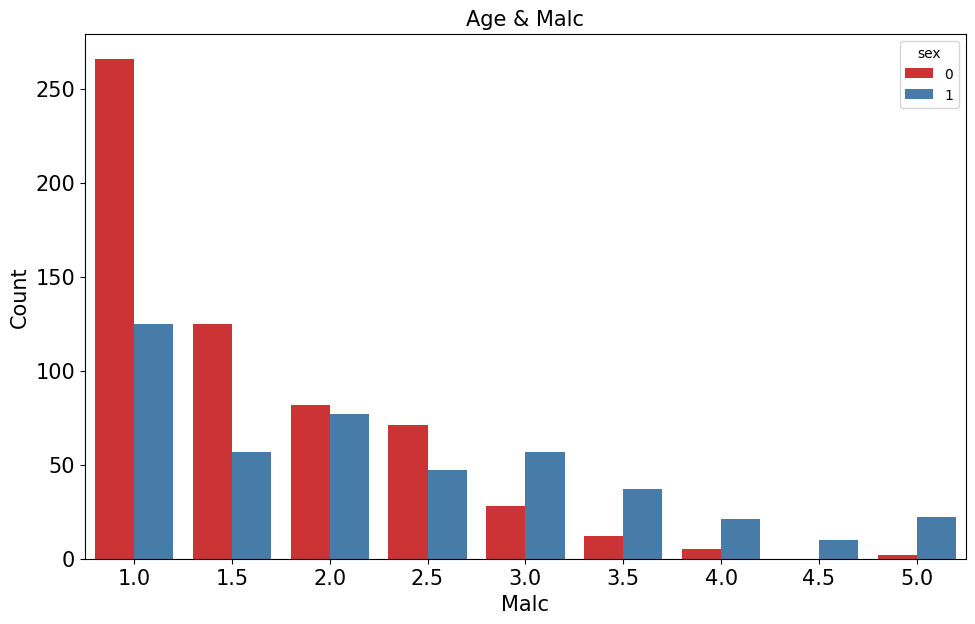

In [288]:
plt.figure(figsize = (15,15))

plt.subplot(221)
sns.barplot(x='sex', y='Malc', data=df_new, palette='Set1')
plt.title('Sex & Malc', size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('sex', fontsize=15)
plt.ylabel('Malc', fontsize=15)

plt.subplot(222)
sns.boxplot(x='sex', y='Malc',data=df_new,
            palette='Set1')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('sex', fontsize=15)
plt.ylabel('Malc', fontsize=15)

plt.figure(figsize = (25,15)) 
plt.subplot(223)
sns.countplot(data=concat_df, x='Malc', hue='sex', palette='Set1')
plt.title('Age & Malc', size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Malc', fontsize=15)
plt.ylabel('Count', fontsize=15)



plt.show()

- 0: 여성
- 1: 남성
<br/>

성별에 따른 음주량에 대한 상관계수는 0.32의 상관관계를 보이고있다. 

위 그래프 분석에 따르면 여성에 비해서 남성이 더 높은 수치의 음주량을 보이고 있다는것이 보여진다.

낮은 음주량에선 여성이 더 높은 비율을 보이고 있으며 음주량이 올라갈수록 급격한 감소세를 보이고있다.

반면 남성의 음주량 경우, 점진적인 감소세를 보이고 있으며 3 level의 음주량부터는 남성이 여성보다 더 높은 비율을 가지고 간다

### 3. 나이 - 음주 빈도수
- 상관계수: 0.12

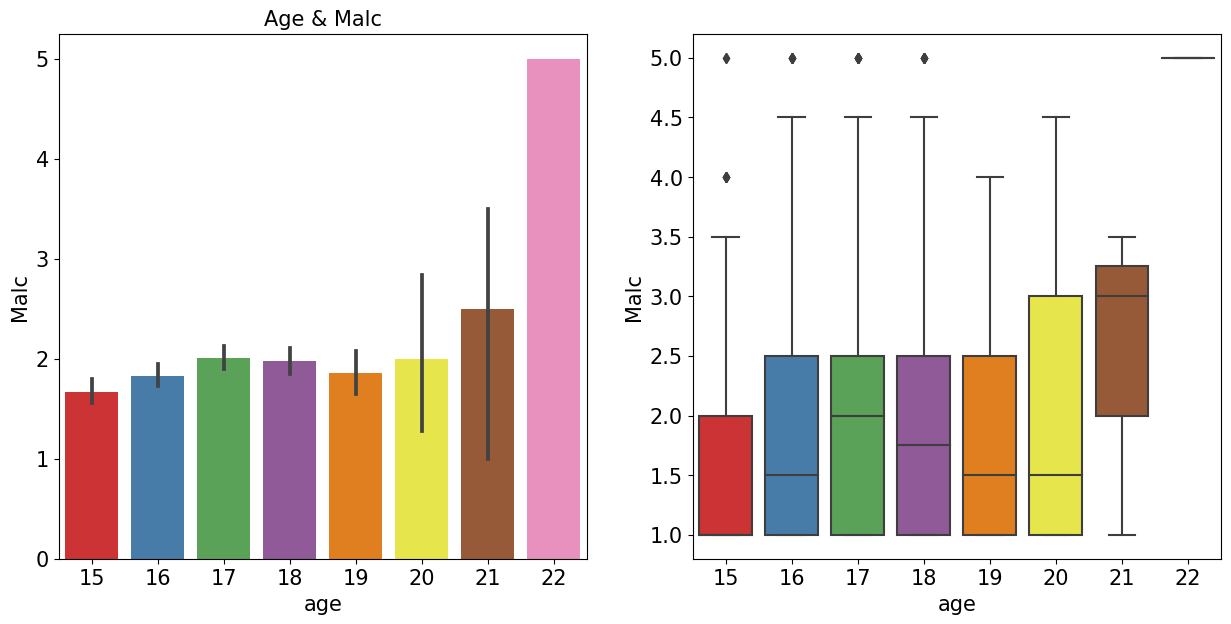

In [290]:
plt.figure(figsize = (15,15))

plt.subplot(221)
sns.barplot(x='age', y='Malc', data=df_new, palette='Set1')
plt.title('Age & Malc', size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('age', fontsize=15)
plt.ylabel('Malc', fontsize=15)

plt.subplot(222)
sns.boxplot(x='age', y='Malc',data=df_new,
            palette='Set1')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('age', fontsize=15)
plt.ylabel('Malc', fontsize=15)

plt.show()

<br/>
상관계수 0.12가 가리키듯 22살때를 제외하곤 나이에 따른 술 섭취량에 큰 변화가 보이지 않는다.

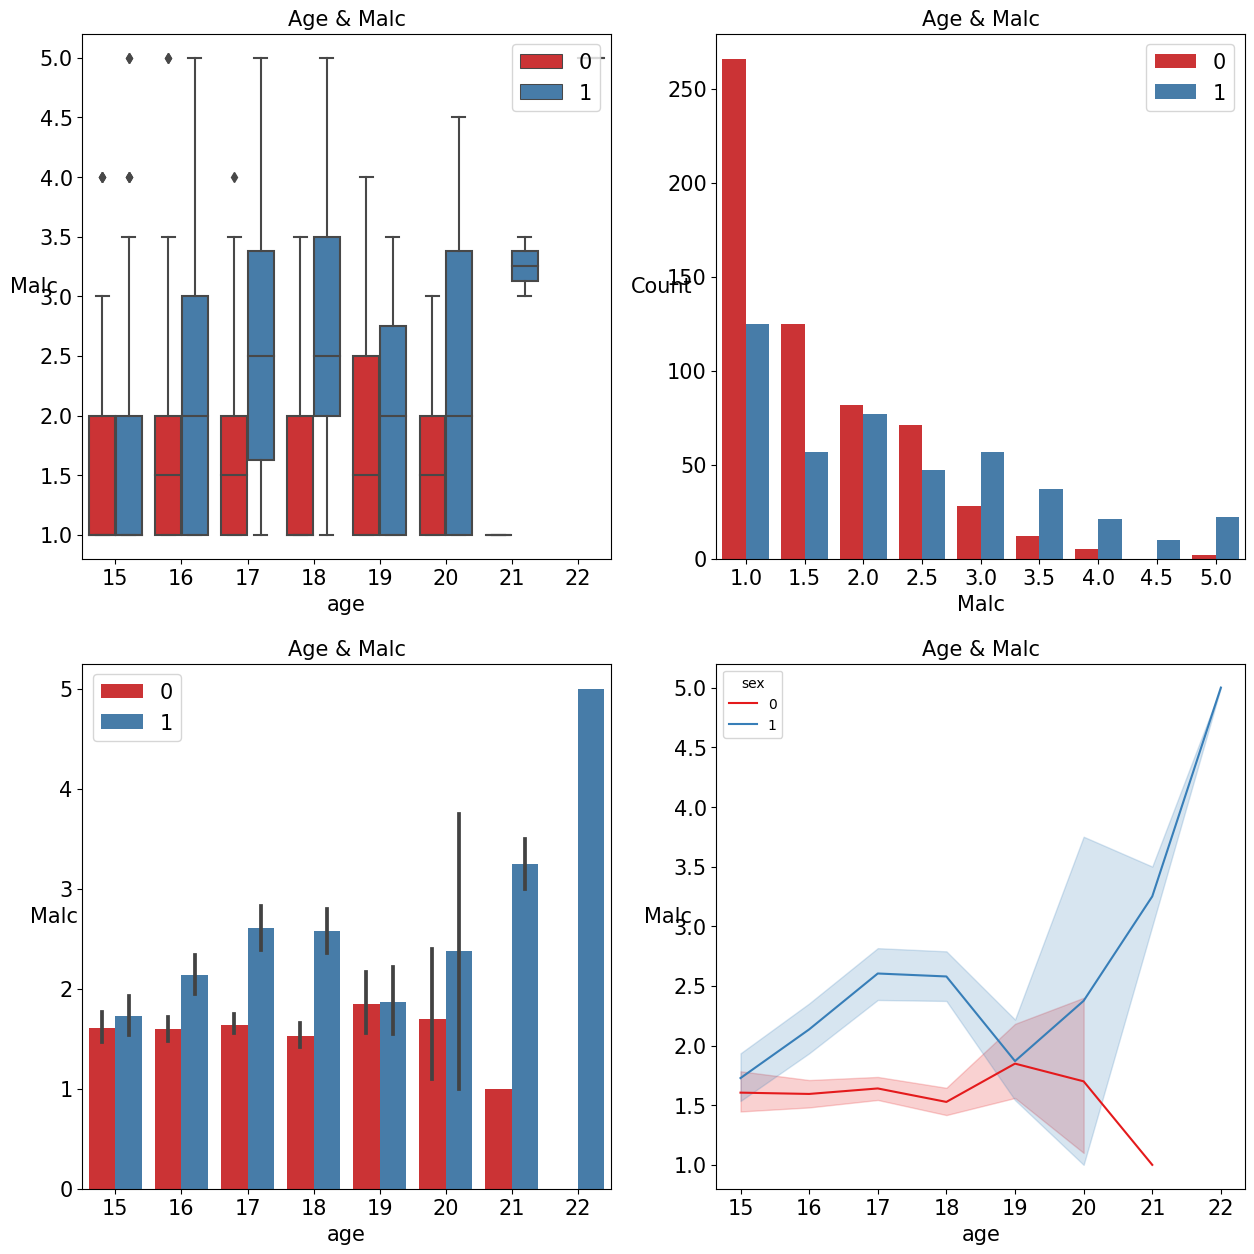

In [291]:

plt.figure(figsize = (15,15))

plt.subplot(221)
sns.boxplot(data=concat_df, x='age',y='Malc' , hue='sex', palette='Set1')
plt.legend(loc='upper right', fontsize=15)
plt.title('Age & Malc', size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('age', fontsize=15)
plt.ylabel('Malc', rotation=0, fontsize=15)


plt.subplot(222)
sns.countplot(data=concat_df, x='Malc', hue='sex', palette='Set1')
plt.legend(loc='upper right', fontsize=15)
plt.title('Age & Malc', size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Malc', fontsize=15)
plt.ylabel('Count', rotation=0, fontsize=15)

plt.subplot(223)
sns.barplot(data=concat_df, x='age',y='Malc' , hue='sex', palette='Set1')
plt.legend(loc='upper left', fontsize=15)
plt.title('Age & Malc', size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('age', fontsize=15)
plt.ylabel('Malc', rotation=0, fontsize=15)


plt.subplot(224)
sns.lineplot(data=concat_df, x='age',y='Malc' , hue='sex', palette='Set1')
plt.title('Age & Malc', size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('age', fontsize=15)
plt.ylabel('Malc', rotation=0, fontsize=15)

plt.show()


### A-2) hue: 성별 / x: 공부시간 / y: 음주빈도

Text(0, 0.5, 'Count')

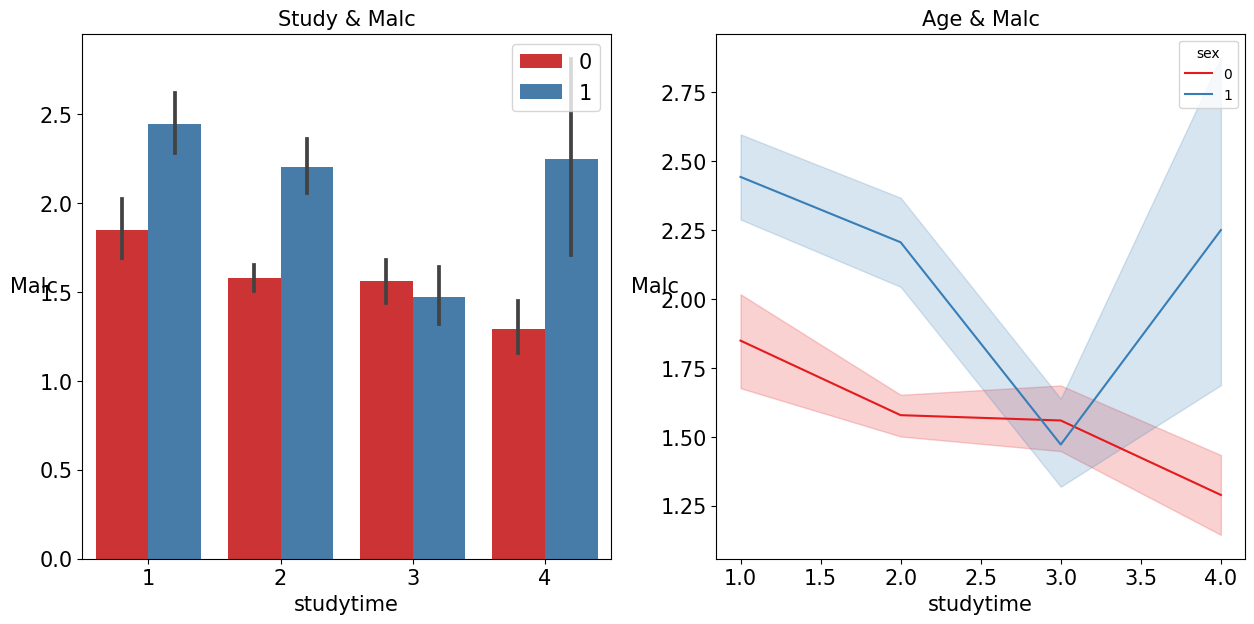

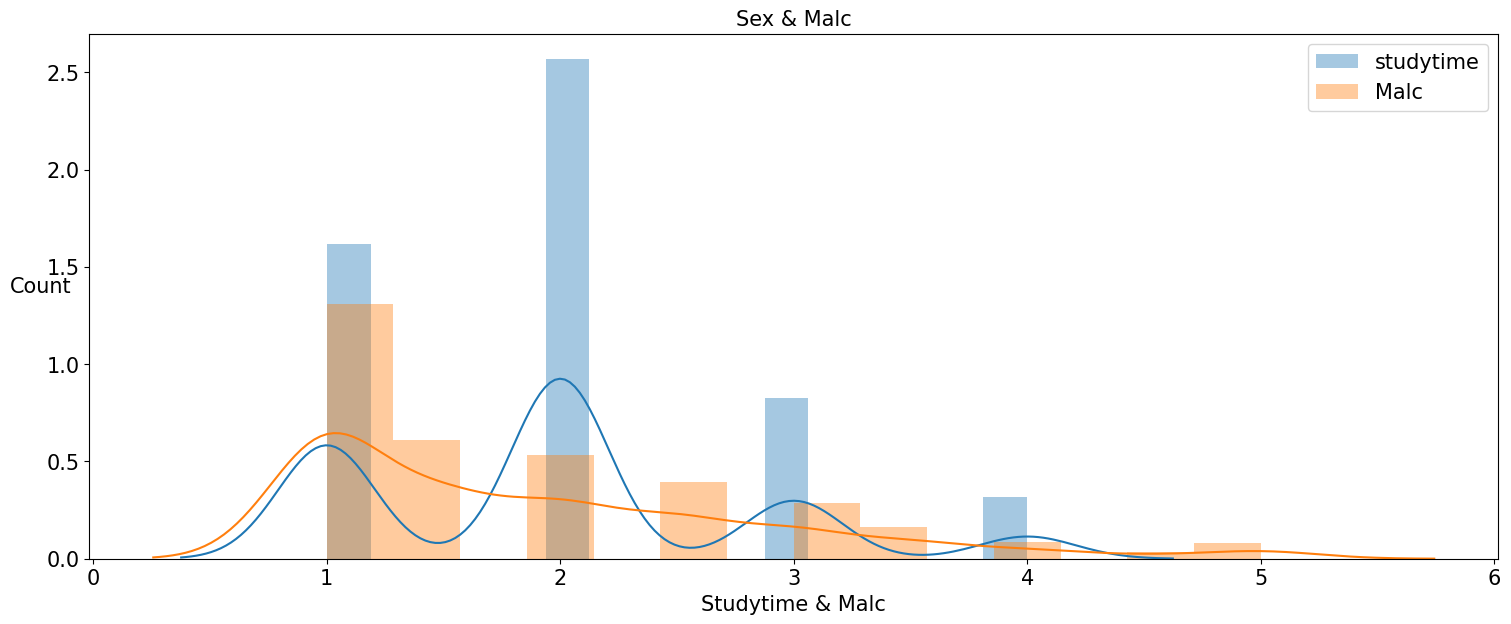

In [184]:
plt.figure(figsize = (15,15))
plt.subplot(221)
sns.barplot(data=concat_df, x='studytime',y='Malc' , hue='sex', palette='Set1')
plt.legend(loc='upper right', fontsize=15)
plt.title('Study & Malc', size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('studytime', fontsize=15)
plt.ylabel('Malc', rotation=0, fontsize=15)


plt.subplot(222)
# sns.lmplot(data=concat_df, x='age',y='Malc' , hue='sex', palette='Set1')
sns.lineplot(data=concat_df, x='studytime',y='Malc' , hue='sex', palette='Set1')
plt.title('Age & Malc', size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('studytime', fontsize=15)
plt.ylabel('Malc', rotation=0, fontsize=15)

plt.figure(figsize = (40,15))
plt.subplot(223)
sns.distplot(df_new['studytime'], label='studytime')
sns.distplot(df_new['Malc'], label = ['Malc'])
plt.legend(loc='upper right', fontsize=15)
plt.title('Sex & Malc', size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Studytime & Malc', fontsize=15)
plt.ylabel('Count', rotation=0, fontsize=15)

### A3) hue: 성별 / x: 이유 / y: 음주빈도 

Text(0, 0.5, 'Malc')

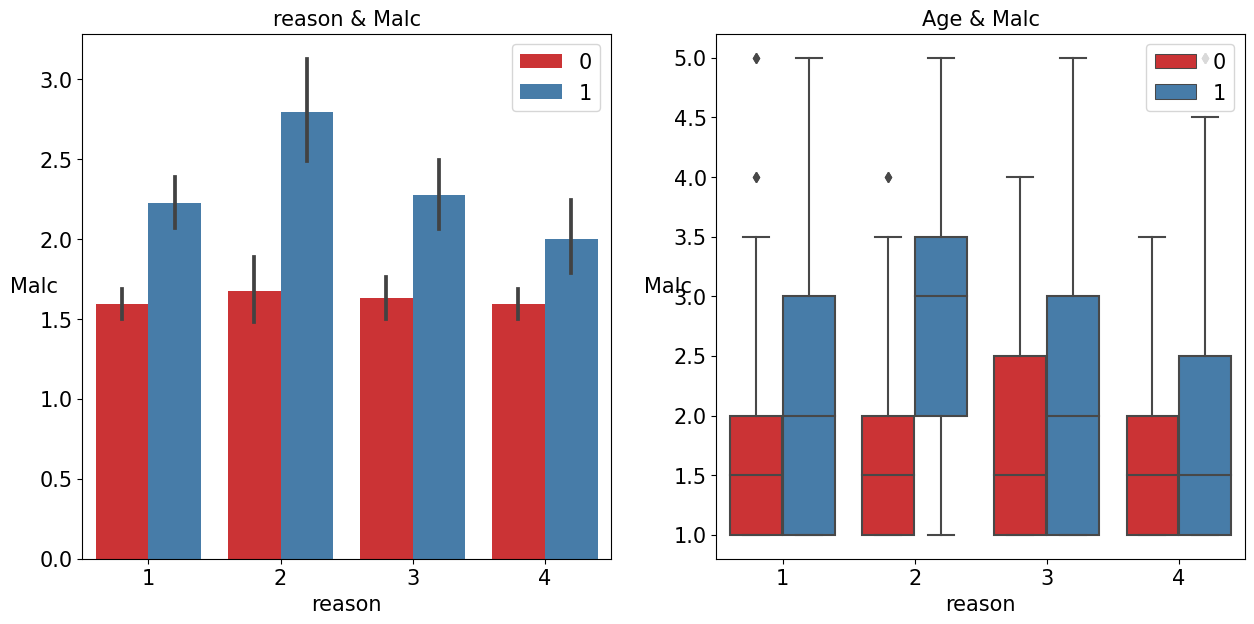

In [189]:
plt.figure(figsize = (15,15))
plt.subplot(221)
sns.barplot(data=concat_df, x='reason',y='Malc' , hue='sex', palette='Set1')
plt.legend(loc='upper right', fontsize=15)
plt.title('reason & Malc', size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('reason', fontsize=15)
plt.ylabel('Malc', rotation=0, fontsize=15)


plt.subplot(222)
sns.boxplot(data=concat_df, x='reason',y='Malc' , hue='sex', palette='Set1')
plt.legend(loc='upper right', fontsize=15)
plt.title('Age & Malc', size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('reason', fontsize=15)
plt.ylabel('Malc', rotation=0, fontsize=15)

## B

### B1) hue: 이유 / x: 나이 / y: 음주빈도

Text(0, 0.5, 'Malc')

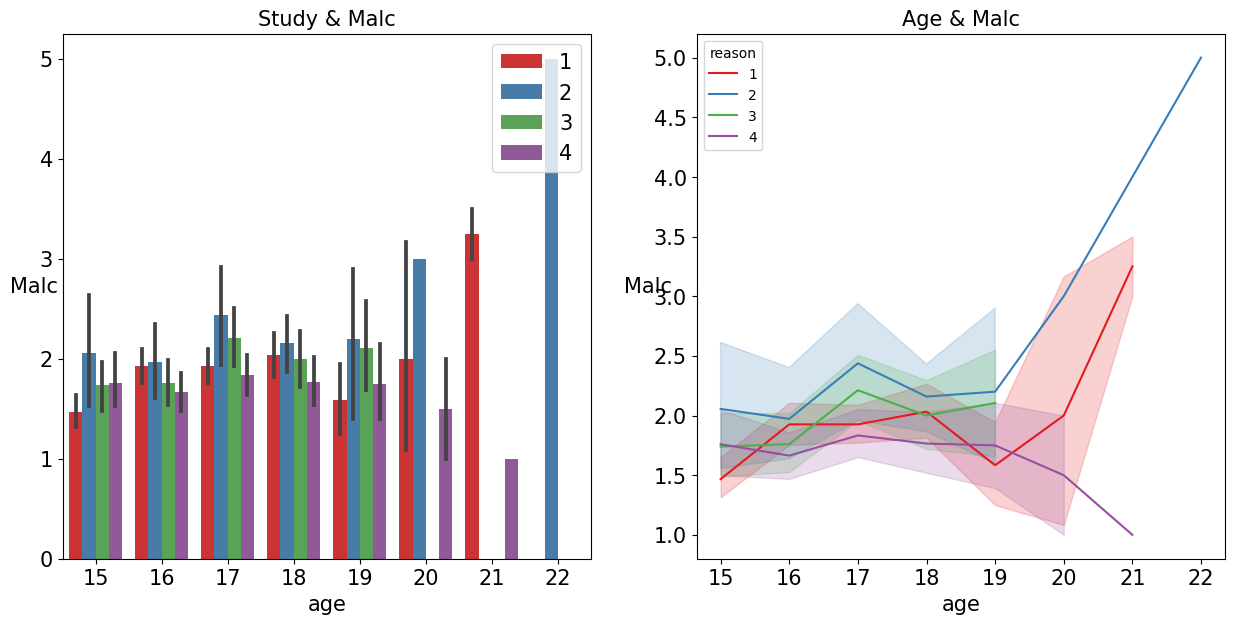

In [191]:
plt.figure(figsize = (15,15))
plt.subplot(221)
sns.barplot(data=concat_df, x='age',y='Malc' , hue='reason', palette='Set1')
plt.legend(loc='upper right', fontsize=15)
plt.title('Study & Malc', size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('age', fontsize=15)
plt.ylabel('Malc', rotation=0, fontsize=15)


plt.subplot(222)
# sns.lmplot(data=concat_df, x='age',y='Malc' , hue='sex', palette='Set1')
sns.lineplot(data=concat_df, x='age',y='Malc' , hue='reason', palette='Set1')
plt.title('Age & Malc', size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('age', fontsize=15)
plt.ylabel('Malc', rotation=0, fontsize=15)
